**IMPORTING PACKAGES**

In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sns.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

import warnings # Supress Warnings
warnings.filterwarnings('ignore')

**TO VIEW ALL THE COLUMNS**

In [2]:
pd.set_option('display.max_columns',None)

**IMPORTING DATA**

In [3]:
df=pd.read_csv('C:/Users/apurv/Downloads/Makaan.csv',encoding='latin-1')

**CHECKING THE FIRST FIVE OBSERVATION**

In [4]:
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Price,Size,Sub_urban_ID,Sub_urban_name,description,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,"4,285",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,1,Ahmedabad,3 BHK,51907,Bopal,72.465103,23.037386,"75,00,000","1,750 sq ft",10229,Ahmedabad West,The house is unfurnished. It has car parking. ...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,"7,000",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,1,Ahmedabad,4 BHK,56407,Ambli,72.479668,23.027061,"2,36,88,000","3,384 sq ft",10229,Ahmedabad West,A 4 bhk property is available for sale in Kesh...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,"5,752",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,1,Ahmedabad,3 BHK,66627,Naryanpura,72.558502,23.055193,"1,32,00,840","2,295 sq ft",10229,Ahmedabad West,It has a built-up area of 2295 sqft and is pri...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,"2,486",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,1,Ahmedabad,2 BHK,51899,Changodar,72.454720,22.940430,"22,83,000",918 sq ft,10228,Ahmedabad South,Its a 2 bhk multistorey apartment situated in...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,"5,324",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,1,Ahmedabad,3 BHK,50368,Shilaj,72.477890,23.043703,"93,71,000","1,760 sq ft",10229,Ahmedabad West,A 3 bhk property is available for sale in Navk...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


# DATA INSPECTION

**NO. OF ROWS AND COLUMNS**

In [5]:
print('NO OF ROWS: ',df.shape[0])
print('NO OF COLUMNS : ',df.shape[1])

NO OF ROWS:  332096
NO OF COLUMNS :  32


**CHECKING DATA-TYPES OF ALL THE COLUMNS**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332096 entries, 0 to 332095
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             217826 non-null  object 
 1   Property_id               332096 non-null  int64  
 2   Property_type             332096 non-null  object 
 3   Property_status           271654 non-null  object 
 4   Price_per_unit_area       332096 non-null  object 
 5   Posted_On                 332096 non-null  object 
 6   Project_URL               332096 non-null  object 
 7   builder_id                149978 non-null  float64
 8   Builder_name              149978 non-null  object 
 9   Property_building_status  332096 non-null  object 
 10  City_id                   332096 non-null  int64  
 11  City_name                 332096 non-null  object 
 12  No_of_BHK                 332096 non-null  object 
 13  Locality_ID               332096 non-null  i

**FIVE POINT SUMMARY OF THE NUMERICAL DATA**

In [7]:
df.describe()

,Property_id,builder_id,City_id,Locality_ID,Longitude,Latitude,Sub_urban_ID,listing_domain_score
count,3.320960e+05,1.499780e+05,332096.000000,332096.000000,332096.000000,332096.000000,332096.000000,332096.000000
mean,1.319382e+07,1.108900e+07,12.137861,63082.944775,77.626544,19.761817,10140.731770,4.005565
std,2.533792e+06,3.100384e+07,7.270491,26246.913783,4.163027,5.311124,197.784494,0.124058
min,5.000114e+06,1.000020e+05,1.000000,50001.000000,23.526030,8.403612,10003.000000,4.000000
25%,1.244466e+07,1.006780e+05,5.000000,50378.000000,73.033897,13.580514,10040.000000,4.000000
50%,1.419741e+07,1.034750e+05,12.000000,51893.000000,77.666607,19.165211,10071.000000,4.000000
75%,1.509555e+07,6.547740e+05,18.000000,60223.000000,80.157450,23.048038,10226.000000,4.000000
max,1.558147e+07,1.007295e+08,23.000000,173237.000000,88.861885,87.360603,11618.000000,9.107140


# DATA CLEANING

**CHECKING FOR NULL VALUES**

In [8]:
df.isnull().sum()

Property_Name               114270
Property_id                      0
Property_type                    0
Property_status              60442
Price_per_unit_area              0
Posted_On                        0
Project_URL                      0
builder_id                  182118
Builder_name                182118
Property_building_status         0
City_id                          0
City_name                        0
No_of_BHK                        0
Locality_ID                      0
Locality_Name                    2
Longitude                        0
Latitude                         0
Price                            0
Size                             0
Sub_urban_ID                     0
Sub_urban_name                   0
description                      1
is_furnished                     0
listing_domain_score             0
is_plot                          0
is_RERA_registered               0
is_Apartment                     0
is_ready_to_move                 0
is_commercial_Listin

**CLEANING 'Price_per_unit_area'**

In [9]:
# 'Price_per_unit_area'(Sq feet) IS AN OBJECT TYPE, SO WE REMOVE COMMA MARK & CONVERT IT TO INTEGER TYPE.

df['Price_per_unit_area']=df['Price_per_unit_area'].apply(lambda x:float(x.replace(',','')))

**CLEANING 'Price'**

In [10]:
# 'Price' IS AN OBJECT TYPE, SO WE REMOVE COMMA MARK & CONVERT IT TO INTEGER TYPE.

df['Price']=df['Price'].apply(lambda x:int(x.replace(',','')))

**CLEANING 'Size'**

In [11]:
# FROM 'Size' WE REMOVE sq. ft.

df['Size']=df['Size'].apply(lambda x: x.split(' ')[0])

In [12]:
# NOW FROM 'Size' WE REMOVE COMMA MARK & CONVERT IT TO INTEGER TYPE.

df['Size']=df['Size'].apply(lambda x:int(x.replace(',','')))

**TREATMENT OF NO. OF BHK COLUMN**

In [13]:
df['No_of_BHK'].unique()

array(['3 BHK', '4 BHK', '2 BHK', '5 BHK', '1 BHK', '1 RK', '0 BHK',
       '12 BHK', '7 BHK', '6 BHK', '8 BHK', '10 BHK', '11 BHK', '9 BHK',
       '15 BHK', '3 RK', '14 BHK', '2 RK'], dtype=object)

In [14]:
df[df['No_of_BHK']=='3 RK']

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Price,Size,Sub_urban_ID,Sub_urban_name,description,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
62286,DLF Commanders Court,14328774,Apartment,Ready to move,8999.0,8 months ago,https://www.makaan.com/chennai/dlf-commanders-...,100002.0,DLF,ACTIVE,5,Chennai,3 RK,51237,Egmore,80.257217,13.065503,4355516,484,10202,Chennai Central,It has a built-up area of 484 sqft and is pric...,Unfurnished,4.0,False,False,True,True,False,False,True,sell
76688,DLF Commanders Court,14328774,Apartment,Ready to move,8999.0,7 months ago,https://www.makaan.com/chennai/dlf-commanders-...,100002.0,DLF,ACTIVE,5,Chennai,3 RK,51237,Egmore,80.257217,13.065503,4355516,484,10202,Chennai Central,Its a 1 rk multistorey apartment situated in ...,Unfurnished,4.0,False,False,True,True,False,False,True,sell


In [15]:
df[df['No_of_BHK']=='2 RK']

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Price,Size,Sub_urban_ID,Sub_urban_name,description,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
238976,Crescent Landmark,14378923,Apartment,Ready to move,21852.0,8 months ago,https://www.makaan.com/mumbai/crescent-constru...,103516.0,Crescent Constructions,ACTIVE,18,Mumbai,2 RK,50022,Andheri East,72.881607,19.110554,9200000,421,10042,Andheri to Dahisar,Its a 1 rk multistorey apartment situated in ...,Furnished,4.0,False,False,True,True,False,False,True,sell
269788,NaN,15351530,Apartment,Ready to move,17500.0,2 months ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,2 RK,50024,Borivali West,72.848724,19.249134,7000000,400,10042,Andheri to Dahisar,Its a 1 rk multistorey apartment situated in ...,Semi-Furnished,4.0,False,False,True,True,False,False,True,sell


In [16]:
df[df['No_of_BHK']=='1 RK']

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Price,Size,Sub_urban_ID,Sub_urban_name,description,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
184,Signature Gokulam,13579980,Apartment,Ready to move,2716.0,2 days ago,https://www.makaan.com/ahmedabad/signature-gro...,105133.0,Signature Group Ahmedabad,ACTIVE,1,Ahmedabad,1 RK,51950,Sarkhej,72.493683,22.980688,1100000,405,10229,Ahmedabad West,Well designed 1 rk multistorey apartment is av...,Furnished,4.0,False,False,True,True,False,False,True,sell
281,NaN,15319883,Apartment,Ready to move,5333.0,2 months ago,https://www.makaan.com/ahmedabad/builder-proje...,NaN,NaN,UNVERIFIED,1,Ahmedabad,1 RK,78970,Meghani Nagar,72.616394,23.056686,1600000,300,10221,Ahmedabad East,This spacious 1 rk multistorey apartment is av...,Semi-Furnished,4.0,False,False,True,True,False,False,True,sell
428,NaN,15543788,Apartment,Ready to move,2857.0,7 days ago,https://www.makaan.com/ahmedabad/builder-proje...,NaN,NaN,UNVERIFIED,1,Ahmedabad,1 RK,52032,Vejalpur,72.518616,23.003904,1000000,350,10229,Ahmedabad West,Well designed 1 rk multistorey apartment is av...,Unfurnished,4.0,False,False,True,True,False,False,True,sell
2232,NaN,15530295,Apartment,Ready to move,3205.0,9 days ago,https://www.makaan.com/ahmedabad/builder-proje...,NaN,NaN,UNVERIFIED,1,Ahmedabad,1 RK,51322,Chandkheda,72.580154,23.115995,2500000,780,10226,Ahmedabad North,Well designed 1 rk multistorey apartment is av...,Unfurnished,4.0,False,False,True,True,False,False,True,sell
2326,NaN,14944647,Apartment,Ready to move,2249.0,4 months ago,https://www.makaan.com/ahmedabad/builder-proje...,NaN,NaN,UNVERIFIED,1,Ahmedabad,1 RK,52097,Sanand,72.381096,22.987049,1799999,800,10229,Ahmedabad West,Its a 1 rk multistorey apartment situated in ...,Unfurnished,4.0,False,False,True,True,False,False,True,sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331734,NaN,13763175,Apartment,Ready to move,5076.0,a year ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,1 RK,81570,Dombivli (West),73.076622,19.221125,1650000,325,10096,Other,This spacious 1 rk multistorey apartment is av...,Unfurnished,4.0,False,False,True,True,False,False,True,sell
331735,NaN,13763175,Apartment,Ready to move,5076.0,a year ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,1 RK,81570,Dombivli (West),73.076622,19.221125,1650000,325,10096,Other,Its a 1 rk multistorey apartment situated in ...,Unfurnished,4.0,False,False,True,True,False,False,True,sell
331756,NaN,12299843,Apartment,Ready to move,4285.0,2 years ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,1 RK,167385,Makane Kapase,72.807007,19.575001,1500000,350,10096,Other,It has a built-up area of 350 sqft and is pric...,Furnished,4.0,False,False,True,True,False,False,True,sell
331758,NaN,12328143,Independent House,Ready to move,23000.0,22 days ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,1 RK,50004,Koper Khairane,73.010506,19.102783,4600000,200,10045,Navi Mumbai,A spacious 1 rk independent house is available...,Unfurnished,4.0,False,False,False,True,False,False,True,sell


In [17]:
#Since the no_of_BHK columns has RK that also in few thousands so we may as well drop them.
i=df[(df['No_of_BHK']=='1 RK') |(df['No_of_BHK']=='2 RK') | (df['No_of_BHK']=='3 RK')].index
len(i)

3059

In [18]:
df.drop(i,inplace=True)
#3059 values dropped

In [19]:
df['No_of_BHK'].unique()

array(['3 BHK', '4 BHK', '2 BHK', '5 BHK', '1 BHK', '0 BHK', '12 BHK',
       '7 BHK', '6 BHK', '8 BHK', '10 BHK', '11 BHK', '9 BHK', '15 BHK',
       '14 BHK'], dtype=object)

In [20]:
# IN THE DATA '0 BHK' ARE THE ONE'S WHICH ARE THE 'RESIDENTIAL PLOTS'.

In [21]:
df[df['No_of_BHK']=='0 BHK']

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Price,Size,Sub_urban_ID,Sub_urban_name,description,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
215,NaN,15528030,Residential Plot,Ready to move,13650.0,9 days ago,https://www.makaan.com/ahmedabad/builder-proje...,NaN,NaN,UNVERIFIED,1,Ahmedabad,0 BHK,52604,Juhapura,72.523506,22.996189,43000000,3150,10229,Ahmedabad West,A plot is available at a prime location in Juh...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
216,NaN,15528240,Residential Plot,Ready to move,518.0,9 days ago,https://www.makaan.com/ahmedabad/builder-proje...,NaN,NaN,UNVERIFIED,1,Ahmedabad,0 BHK,105460,Goraj,72.320763,22.978149,700000,1350,10094,Other,A plot is available at a prime location in Gor...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
272,Addor SWAYAM Plots AND Weekend Homes in Sanand,13609650,Residential Plot,Ready to move,731.0,2 months ago,https://www.makaan.com/ahmedabad/addor-realty-...,109526.0,Addor Realty,ACTIVE,1,Ahmedabad,0 BHK,52097,Sanand,72.300301,22.957380,1801915,2465,10229,Ahmedabad West,A plot property is available for sale in Addor...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
274,Addor SWAYAM Plots AND Weekend Homes in Sanand,14278504,Residential Plot,Ready to move,730.0,2 months ago,https://www.makaan.com/ahmedabad/addor-realty-...,109526.0,Addor Realty,ACTIVE,1,Ahmedabad,0 BHK,52097,Sanand,72.300301,22.957380,2336000,3200,10229,Ahmedabad West,This plot is situated in Addor Realty SWAYAM P...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
275,Davda Bellevue Vieraaa,12898287,Residential Plot,Ready to move,1111.0,3 months ago,https://www.makaan.com/ahmedabad/davda-infrast...,105087.0,Davda Infrastructure,ACTIVE,1,Ahmedabad,0 BHK,52150,Bavla,72.296120,22.826008,5000000,4500,10228,Ahmedabad South,This plot is situated in Davda Infrastructure ...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332026,NaN,14648986,Residential Plot,Ready to move,350.0,6 months ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,0 BHK,51484,Shahapur,73.320671,19.452677,783650,2239,10043,Beyond Thane,A plot is available at a prime location in Sha...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
332027,NaN,7169009,Residential Plot,NaN,1455.0,5 months ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,0 BHK,51111,Palghar,72.767120,19.700720,29100000,20000,10041,Mira Road and Beyond,A plot is available at a prime location in Pal...,Unfurnished,4.0,True,False,False,False,False,False,False,sell
332028,NaN,13777273,Residential Plot,Ready to move,3962.0,a year ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,0 BHK,51731,Dombivali East,73.104202,19.193178,1700000,429,10043,Beyond Thane,A plot is available at a prime location in Dom...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
332029,NaN,13777273,Residential Plot,Ready to move,3962.0,a year ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,0 BHK,51731,Dombivali East,73.104202,19.193178,1700000,429,10043,Beyond Thane,"This plot is situated in Dombivali East, Mumba...",Unfurnished,4.0,True,False,False,True,False,False,False,sell


In [22]:
df[df['Property_type']=='Residential Plot']

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Price,Size,Sub_urban_ID,Sub_urban_name,description,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
215,NaN,15528030,Residential Plot,Ready to move,13650.0,9 days ago,https://www.makaan.com/ahmedabad/builder-proje...,NaN,NaN,UNVERIFIED,1,Ahmedabad,0 BHK,52604,Juhapura,72.523506,22.996189,43000000,3150,10229,Ahmedabad West,A plot is available at a prime location in Juh...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
216,NaN,15528240,Residential Plot,Ready to move,518.0,9 days ago,https://www.makaan.com/ahmedabad/builder-proje...,NaN,NaN,UNVERIFIED,1,Ahmedabad,0 BHK,105460,Goraj,72.320763,22.978149,700000,1350,10094,Other,A plot is available at a prime location in Gor...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
272,Addor SWAYAM Plots AND Weekend Homes in Sanand,13609650,Residential Plot,Ready to move,731.0,2 months ago,https://www.makaan.com/ahmedabad/addor-realty-...,109526.0,Addor Realty,ACTIVE,1,Ahmedabad,0 BHK,52097,Sanand,72.300301,22.957380,1801915,2465,10229,Ahmedabad West,A plot property is available for sale in Addor...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
274,Addor SWAYAM Plots AND Weekend Homes in Sanand,14278504,Residential Plot,Ready to move,730.0,2 months ago,https://www.makaan.com/ahmedabad/addor-realty-...,109526.0,Addor Realty,ACTIVE,1,Ahmedabad,0 BHK,52097,Sanand,72.300301,22.957380,2336000,3200,10229,Ahmedabad West,This plot is situated in Addor Realty SWAYAM P...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
275,Davda Bellevue Vieraaa,12898287,Residential Plot,Ready to move,1111.0,3 months ago,https://www.makaan.com/ahmedabad/davda-infrast...,105087.0,Davda Infrastructure,ACTIVE,1,Ahmedabad,0 BHK,52150,Bavla,72.296120,22.826008,5000000,4500,10228,Ahmedabad South,This plot is situated in Davda Infrastructure ...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332026,NaN,14648986,Residential Plot,Ready to move,350.0,6 months ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,0 BHK,51484,Shahapur,73.320671,19.452677,783650,2239,10043,Beyond Thane,A plot is available at a prime location in Sha...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
332027,NaN,7169009,Residential Plot,NaN,1455.0,5 months ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,0 BHK,51111,Palghar,72.767120,19.700720,29100000,20000,10041,Mira Road and Beyond,A plot is available at a prime location in Pal...,Unfurnished,4.0,True,False,False,False,False,False,False,sell
332028,NaN,13777273,Residential Plot,Ready to move,3962.0,a year ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,0 BHK,51731,Dombivali East,73.104202,19.193178,1700000,429,10043,Beyond Thane,A plot is available at a prime location in Dom...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
332029,NaN,13777273,Residential Plot,Ready to move,3962.0,a year ago,https://www.makaan.com/mumbai/builder-project-...,NaN,NaN,UNVERIFIED,18,Mumbai,0 BHK,51731,Dombivali East,73.104202,19.193178,1700000,429,10043,Beyond Thane,"This plot is situated in Dombivali East, Mumba...",Unfurnished,4.0,True,False,False,True,False,False,False,sell


In [23]:
#change the No_of_BHK column to integer
df['No_of_BHK']=df['No_of_BHK'].apply(lambda x:int(x.split(' ')[0]))

**'Property_Name' has no effect on the price of the property.**

In [24]:
#It also has 1lakh+ null values.
#So we drop it all together.

df.drop('Property_Name',axis=1,inplace=True)

**'property_id'**

In [25]:
#check unique values in property_id

len(df['Property_id'].unique())

204826

In [26]:
#drop property_id
df.drop('Property_id',axis=1,inplace=True)

**'Posted_On'**

In [27]:
#posted on
df['Posted_On'].unique()

array(['1 day ago', '2 days ago', '5 days ago', '8 days ago',
       '9 days ago', '17 days ago', '21 days ago', '18 days ago',
       '25 days ago', 'a month ago', '24 days ago', '2 months ago',
       '10 hours ago', '3 months ago', '4 months ago', '5 months ago',
       '6 days ago', '3 days ago', '7 days ago', '4 days ago',
       '15 days ago', '19 days ago', '11 days ago', '10 days ago',
       '10 months ago', '6 months ago', '22 days ago', 'a year ago',
       '9 months ago', '16 days ago', '9 hours ago', '6 hours ago',
       '12 days ago', '14 days ago', '7 months ago', '23 days ago',
       '20 days ago', '8 months ago', '13 days ago', '2 years ago',
       '7 hours ago', '3 hours ago', '4 hours ago', '2 hours ago',
       '8 hours ago', '5 hours ago', '11 hours ago', '19 hours ago',
       '12 hours ago', '21 hours ago', 'an hour ago', '14 hours ago',
       '26 minutes ago', '37 minutes ago', '18 hours ago', '20 hours ago',
       '3 years ago', '42 minutes ago', '15 hours

In [28]:
len(df['Posted_On'].unique())

83

In [29]:
#Its better to drop 'Posted_On' because it will change every minute and property prices do not change so frequently.

In [30]:
df.drop('Posted_On',axis=1,inplace=True)

**'listing_domain_score'**

In [31]:
df.drop('listing_domain_score',axis=1,inplace=True)

**'Project_URL'**

In [32]:
#every url is unique
#we drop Project_URL
df.drop('Project_URL',axis=1,inplace=True)

**Builder_id & Builder_name**

In [33]:
df['builder_id'].unique(),df['Builder_name'].unique()

(array([1.00563465e+08, 1.00009433e+08, 1.00207731e+08, ...,
        5.68555000e+05, 5.74703000e+05, 1.00479765e+08]),
 array(['Arkiton life Space', 'Keshav Narayan Group',
        'Vishwa Developers Ahmedabad', ..., 'Kingz Castle Real Estate',
        'Srusti Realmart', 'Antalica Group'], dtype=object))

In [34]:
len(df['builder_id'].unique()),len(df['Builder_name'].unique())

(8903, 8900)

In [35]:
#drop them but storing 'Builder_name' in a variable to use insights later
builder_name=df['Builder_name']

In [36]:
builder_name

0                  Arkiton life Space
1                Keshav Narayan Group
2         Vishwa Developers Ahmedabad
3                   Satyam Developers
4           Navkar Buildcon Ahmedabad
                     ...             
332091     Rajlaxmi Developers Mumbai
332092     Rajlaxmi Developers Mumbai
332093     Rajlaxmi Developers Mumbai
332094     Rajlaxmi Developers Mumbai
332095     Rajlaxmi Developers Mumbai
Name: Builder_name, Length: 329037, dtype: object

In [37]:
df.drop(['builder_id','Builder_name'],axis=1,inplace=True)

**City_name and City_id**

In [38]:
df['City_name'].unique()

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Lucknow', 'Mumbai'], dtype=object)

In [39]:
df['City_id'].unique()

array([ 1,  2,  5,  6, 12, 16, 23, 18], dtype=int64)

In [40]:
#Here both are indicating same thing , so we drop city_id 
#This way we can encode City_name.

In [41]:
df.drop('City_id',axis=1,inplace=True)

**Locality_ID and Locality_Name**

In [42]:
df['Locality_Name'].unique()

array(['Bopal', 'Ambli', 'Naryanpura', ..., 'Kurgaon', 'Navin Sheva',
       'Samata Nagar Thakur Village'], dtype=object)

In [43]:
df['Locality_ID'].unique()

array([ 51907,  56407,  66627, ..., 103253, 104441, 162342], dtype=int64)

In [44]:
len(df['Locality_ID'].unique()),len(df['Locality_Name'].unique())

(5162, 5032)

In [45]:
#we can drop it

In [46]:
df.drop(['Locality_Name','Locality_ID'],axis=1,inplace=True)

**'Latitude' and 'Longitude'**

In [47]:
#we have City_name to identify the area therefore, can drop Longitide and Latitude
df.drop(['Latitude','Longitude'],axis=1,inplace=True)

**Sub_urban_name and Sub_urban_ID**

In [48]:
df['Sub_urban_name'].unique()

array(['Ahmedabad West', 'Ahmedabad South', 'Ahmedabad North',
       'Ahmedabad East', 'SG Highway', 'Ahmedabad Central', 'Other',
       'Sanand1', 'Khokhra Circle', 'Sarjapur Road Before Wipro',
       'Bannerghatta Road', 'Whitefield', 'Bangalore North',
       'Bangalore West', 'Mysore Road', 'Hosur Road', 'Old Madras Road',
       'Bangalore South', 'Bangalore East', 'Sarjapur Road',
       'Hennur Main Road', 'Old Airport Road', 'Bangalore Central',
       'Outer Ring Road', 'Kanakapura Road', 'Thanisandra Main Road',
       'New Airport Road', 'ECR', 'Chennai West', 'GST', 'OMR',
       'Chennai North', 'Chennai South', 'Vandalur Kelambakkam Road',
       'Chennai Central', 'Vandalur Road', 'Arcot Road  Saligramam',
       'Tharamani', 'Chennai Bypass Road', 'OMR Bypass Road',
       'Kodungaiyur East', 'Delhi South', 'North Delhi', 'Delhi East',
       'West Delhi', 'Rohini', 'Delhi Central',
       'Near Bahadurgarh Metro Station', 'Dwarka', 'Delhi North',
       'South West 

In [49]:
len(df['Sub_urban_name'].unique())

101

In [50]:
df['Sub_urban_ID'].unique()

array([10229, 10228, 10226, 10221, 10003, 10237, 10094, 10077, 10075,
       11262, 10383, 10512, 10008, 10010, 10450, 10447, 10445, 10011,
       10007, 10442, 10444, 10088, 10441, 10006, 10446, 10451, 10443,
       11477, 10259, 10015, 10263, 10089, 10257, 10013, 10016, 10266,
       10202, 10265, 11478, 11488, 10264, 10261, 11487, 10022, 10177,
       10019, 10571, 10176, 11606, 10018, 11613, 10212, 10558, 11473,
       10559, 11474, 11475, 11618, 10199, 10082, 10233, 10238, 10033,
       10071, 10977, 10179, 10976, 10234, 10560, 10092, 11472, 10203,
       10039, 10035, 10036, 10038, 10093, 10223, 10235, 11482, 11210,
       10276, 10271, 10242, 10099, 10275, 10272, 10293, 10285, 10078,
       10474, 10297, 10084, 11200, 10042, 10048, 10043, 10045, 10041,
       10044, 10040, 10175, 10299, 10046, 10096, 10561, 10566, 10562],
      dtype=int64)

In [51]:
len(df['Sub_urban_ID'].unique())

108

In [52]:
#Drop Sub_urban_ID because its an int where as Sub_urban_name is object and can be encoded.
df.drop('Sub_urban_ID',axis=1,inplace=True)

**'description'**

In [53]:
#drop description as well
df.drop('description',axis=1,inplace=True)

In [54]:
df['Property_type'].value_counts()

Apartment            186131
Residential Plot      93765
Independent Floor     22451
Independent House     13388
Villa                 13302
Name: Property_type, dtype: int64

**'Listing_Category'**

In [55]:
#Listing_Category has only one value i.e sell

In [56]:
df['Listing_Category'].unique()

array(['sell'], dtype=object)

In [57]:
df.drop('Listing_Category',axis=1,inplace=True)

**Viewing some more columns**

In [58]:
df['Property_status'].value_counts()

Ready to move         177408
Under Construction     91187
Name: Property_status, dtype: int64

In [59]:
df['Property_building_status'].unique()

array(['ACTIVE', 'UNVERIFIED', 'INACTIVE'], dtype=object)

In [60]:
df['is_furnished'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [61]:
df[(df['is_Apartment']==True) & (df['Property_type']=='Apartment')]

#is_apartment and Property_type tells the same thing

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio
0,Apartment,Under Construction,4285.0,ACTIVE,Ahmedabad,3,7500000,1750,Ahmedabad West,Unfurnished,False,True,True,False,False,False,False
1,Apartment,Under Construction,7000.0,ACTIVE,Ahmedabad,4,23688000,3384,Ahmedabad West,Unfurnished,False,True,True,False,False,False,False
2,Apartment,Ready to move,5752.0,ACTIVE,Ahmedabad,3,13200840,2295,Ahmedabad West,Unfurnished,False,False,True,True,False,False,False
3,Apartment,Ready to move,2486.0,ACTIVE,Ahmedabad,2,2283000,918,Ahmedabad South,Unfurnished,False,False,True,True,False,False,False
4,Apartment,Under Construction,5324.0,ACTIVE,Ahmedabad,3,9371000,1760,Ahmedabad West,Unfurnished,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332091,Apartment,Under Construction,9826.0,ACTIVE,Mumbai,1,3400000,346,Mira Road and Beyond,Unfurnished,False,True,True,False,False,False,False
332092,Apartment,Under Construction,8568.0,ACTIVE,Mumbai,1,3650000,426,Mira Road and Beyond,Unfurnished,False,True,True,False,False,False,False
332093,Apartment,Under Construction,9861.0,ACTIVE,Mumbai,1,3550000,360,Mira Road and Beyond,Unfurnished,False,True,True,False,False,False,False
332094,Apartment,Under Construction,8813.0,ACTIVE,Mumbai,2,5200000,590,Mira Road and Beyond,Unfurnished,False,True,True,False,False,False,False


In [62]:
len(df[df['is_plot']==True]),len(df[df['Property_type']=='Residential Plot'])

(93765, 93765)

In [63]:
df[(df['is_plot']==True) & (df['Property_type']=='Residential Plot')]

#is_plot and Property_type gives same information

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio
215,Residential Plot,Ready to move,13650.0,UNVERIFIED,Ahmedabad,0,43000000,3150,Ahmedabad West,Unfurnished,True,False,False,True,False,False,False
216,Residential Plot,Ready to move,518.0,UNVERIFIED,Ahmedabad,0,700000,1350,Other,Unfurnished,True,False,False,True,False,False,False
272,Residential Plot,Ready to move,731.0,ACTIVE,Ahmedabad,0,1801915,2465,Ahmedabad West,Unfurnished,True,False,False,True,False,False,False
274,Residential Plot,Ready to move,730.0,ACTIVE,Ahmedabad,0,2336000,3200,Ahmedabad West,Unfurnished,True,False,False,True,False,False,False
275,Residential Plot,Ready to move,1111.0,ACTIVE,Ahmedabad,0,5000000,4500,Ahmedabad South,Unfurnished,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332026,Residential Plot,Ready to move,350.0,UNVERIFIED,Mumbai,0,783650,2239,Beyond Thane,Unfurnished,True,False,False,True,False,False,False
332027,Residential Plot,NaN,1455.0,UNVERIFIED,Mumbai,0,29100000,20000,Mira Road and Beyond,Unfurnished,True,False,False,False,False,False,False
332028,Residential Plot,Ready to move,3962.0,UNVERIFIED,Mumbai,0,1700000,429,Beyond Thane,Unfurnished,True,False,False,True,False,False,False
332029,Residential Plot,Ready to move,3962.0,UNVERIFIED,Mumbai,0,1700000,429,Beyond Thane,Unfurnished,True,False,False,True,False,False,False


In [64]:
#We drop 'is_plot' and 'is_Apartment'.
df.drop(['is_plot','is_Apartment'],axis=1,inplace=True)

In [65]:
df[df['Property_status']=='Ready to move']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio
2,Apartment,Ready to move,5752.0,ACTIVE,Ahmedabad,3,13200840,2295,Ahmedabad West,Unfurnished,False,True,False,False,False
3,Apartment,Ready to move,2486.0,ACTIVE,Ahmedabad,2,2283000,918,Ahmedabad South,Unfurnished,False,True,False,False,False
7,Apartment,Ready to move,6031.0,ACTIVE,Ahmedabad,3,9661662,1602,Ahmedabad West,Unfurnished,False,True,False,False,False
11,Apartment,Ready to move,4474.0,ACTIVE,Ahmedabad,3,8900000,1989,Ahmedabad North,Unfurnished,False,True,False,False,False
16,Apartment,Ready to move,6829.0,ACTIVE,Ahmedabad,4,26000000,3807,Ahmedabad West,Unfurnished,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332028,Residential Plot,Ready to move,3962.0,UNVERIFIED,Mumbai,0,1700000,429,Beyond Thane,Unfurnished,False,True,False,False,False
332029,Residential Plot,Ready to move,3962.0,UNVERIFIED,Mumbai,0,1700000,429,Beyond Thane,Unfurnished,False,True,False,False,False
332030,Residential Plot,Ready to move,505.0,UNVERIFIED,Mumbai,0,1100000,2178,Beyond Thane,Unfurnished,False,True,False,False,False
332073,Apartment,Ready to move,5405.0,ACTIVE,Mumbai,1,2000000,370,Beyond Thane,Unfurnished,False,True,False,False,False


In [66]:
df[df['is_ready_to_move']==True]

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio
2,Apartment,Ready to move,5752.0,ACTIVE,Ahmedabad,3,13200840,2295,Ahmedabad West,Unfurnished,False,True,False,False,False
3,Apartment,Ready to move,2486.0,ACTIVE,Ahmedabad,2,2283000,918,Ahmedabad South,Unfurnished,False,True,False,False,False
7,Apartment,Ready to move,6031.0,ACTIVE,Ahmedabad,3,9661662,1602,Ahmedabad West,Unfurnished,False,True,False,False,False
11,Apartment,Ready to move,4474.0,ACTIVE,Ahmedabad,3,8900000,1989,Ahmedabad North,Unfurnished,False,True,False,False,False
16,Apartment,Ready to move,6829.0,ACTIVE,Ahmedabad,4,26000000,3807,Ahmedabad West,Unfurnished,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332028,Residential Plot,Ready to move,3962.0,UNVERIFIED,Mumbai,0,1700000,429,Beyond Thane,Unfurnished,False,True,False,False,False
332029,Residential Plot,Ready to move,3962.0,UNVERIFIED,Mumbai,0,1700000,429,Beyond Thane,Unfurnished,False,True,False,False,False
332030,Residential Plot,Ready to move,505.0,UNVERIFIED,Mumbai,0,1100000,2178,Beyond Thane,Unfurnished,False,True,False,False,False
332073,Apartment,Ready to move,5405.0,ACTIVE,Mumbai,1,2000000,370,Beyond Thane,Unfurnished,False,True,False,False,False


In [67]:
df.drop('is_ready_to_move',axis=1,inplace=True)

#is_ready_to_move and Property_status tells the same thing
#drop is_ready_to_move

In [68]:
df['is_commercial_Listing'].unique()

array([False])

In [69]:
#none of the property are for commercial use
df.drop('is_commercial_Listing',axis=1,inplace=True)

In [70]:
df['is_PentaHouse'].unique(),df['is_studio'].unique()

(array([False,  True]), array([False]))

In [71]:
df['is_PentaHouse'].value_counts()

False    328924
True        113
Name: is_PentaHouse, dtype: int64

In [72]:
df['is_studio'].value_counts()

False    329037
Name: is_studio, dtype: int64

In [73]:
df.drop('is_studio',axis=1,inplace=True)

**TREATING NULL VALUES**

In [74]:
df.isnull().sum()

#MOST OF THE NULL VALUES ARE TREATED

Property_type                   0
Property_status             60442
Price_per_unit_area             0
Property_building_status        0
City_name                       0
No_of_BHK                       0
Price                           0
Size                            0
Sub_urban_name                  0
is_furnished                    0
is_RERA_registered              0
is_PentaHouse                   0
dtype: int64

**TREATING 'Property_status'**

In [75]:
df['Property_status'].unique()

array(['Under Construction', 'Ready to move', nan], dtype=object)

In [76]:
df[df['Property_status'].isnull()]

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_PentaHouse
8971,Residential Plot,NaN,2222.0,UNVERIFIED,Ahmedabad,0,8440000,3798,Ahmedabad North,Unfurnished,False,False
9157,Residential Plot,NaN,555.0,UNVERIFIED,Ahmedabad,0,600000,1080,Ahmedabad South,Unfurnished,False,False
9164,Residential Plot,NaN,666.0,UNVERIFIED,Ahmedabad,0,2100000,3150,Ahmedabad South,Unfurnished,False,False
9282,Residential Plot,NaN,809.0,UNVERIFIED,Ahmedabad,0,6000000,7416,Ahmedabad South,Unfurnished,False,False
9307,Residential Plot,NaN,10555.0,UNVERIFIED,Ahmedabad,0,38000000,3600,Ahmedabad West,Unfurnished,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
332016,Residential Plot,NaN,909.0,UNVERIFIED,Mumbai,0,5000000,5500,Beyond Thane,Unfurnished,False,False
332017,Residential Plot,NaN,493.0,ACTIVE,Mumbai,0,850000,1722,Beyond Thane,Unfurnished,False,False
332021,Residential Plot,NaN,229.0,UNVERIFIED,Mumbai,0,250000,1089,Other,Unfurnished,False,False
332022,Residential Plot,NaN,3962.0,UNVERIFIED,Mumbai,0,1700000,429,Other,Unfurnished,False,False


In [77]:
df[df['Property_type']=='Residential Plot']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_PentaHouse
215,Residential Plot,Ready to move,13650.0,UNVERIFIED,Ahmedabad,0,43000000,3150,Ahmedabad West,Unfurnished,False,False
216,Residential Plot,Ready to move,518.0,UNVERIFIED,Ahmedabad,0,700000,1350,Other,Unfurnished,False,False
272,Residential Plot,Ready to move,731.0,ACTIVE,Ahmedabad,0,1801915,2465,Ahmedabad West,Unfurnished,False,False
274,Residential Plot,Ready to move,730.0,ACTIVE,Ahmedabad,0,2336000,3200,Ahmedabad West,Unfurnished,False,False
275,Residential Plot,Ready to move,1111.0,ACTIVE,Ahmedabad,0,5000000,4500,Ahmedabad South,Unfurnished,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
332026,Residential Plot,Ready to move,350.0,UNVERIFIED,Mumbai,0,783650,2239,Beyond Thane,Unfurnished,False,False
332027,Residential Plot,NaN,1455.0,UNVERIFIED,Mumbai,0,29100000,20000,Mira Road and Beyond,Unfurnished,False,False
332028,Residential Plot,Ready to move,3962.0,UNVERIFIED,Mumbai,0,1700000,429,Beyond Thane,Unfurnished,False,False
332029,Residential Plot,Ready to move,3962.0,UNVERIFIED,Mumbai,0,1700000,429,Beyond Thane,Unfurnished,False,False


In [78]:
prop_status_null=df[df['Property_status'].isnull()]

In [79]:
prop_status_null

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_PentaHouse
8971,Residential Plot,NaN,2222.0,UNVERIFIED,Ahmedabad,0,8440000,3798,Ahmedabad North,Unfurnished,False,False
9157,Residential Plot,NaN,555.0,UNVERIFIED,Ahmedabad,0,600000,1080,Ahmedabad South,Unfurnished,False,False
9164,Residential Plot,NaN,666.0,UNVERIFIED,Ahmedabad,0,2100000,3150,Ahmedabad South,Unfurnished,False,False
9282,Residential Plot,NaN,809.0,UNVERIFIED,Ahmedabad,0,6000000,7416,Ahmedabad South,Unfurnished,False,False
9307,Residential Plot,NaN,10555.0,UNVERIFIED,Ahmedabad,0,38000000,3600,Ahmedabad West,Unfurnished,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
332016,Residential Plot,NaN,909.0,UNVERIFIED,Mumbai,0,5000000,5500,Beyond Thane,Unfurnished,False,False
332017,Residential Plot,NaN,493.0,ACTIVE,Mumbai,0,850000,1722,Beyond Thane,Unfurnished,False,False
332021,Residential Plot,NaN,229.0,UNVERIFIED,Mumbai,0,250000,1089,Other,Unfurnished,False,False
332022,Residential Plot,NaN,3962.0,UNVERIFIED,Mumbai,0,1700000,429,Other,Unfurnished,False,False


In [80]:
prop_status_null['Property_type'].unique()

array(['Residential Plot', 'Apartment', 'Villa'], dtype=object)

In [81]:
prop_status_null['Property_type'].value_counts()

Residential Plot    60423
Apartment              16
Villa                   3
Name: Property_type, dtype: int64

In [82]:
#Most of the null values are in the Residential plot.
#we can fill it with ready to move because being just a plot it has no  construction and is always ready to move.
#Apartment and villa can be ready to move or under construction.
#They are only 19 such values , so its better to drop  them.

In [83]:
df[(df['Property_status'].isnull()) & ((df['Property_type']=='Apartment') | (df['Property_type']=='Villa'))]

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_PentaHouse
150507,Apartment,NaN,867.0,ACTIVE,Hyderabad,3,1840000,2120,Hyderabad East,Unfurnished,False,False
150765,Apartment,NaN,1284.0,ACTIVE,Hyderabad,2,1168000,909,Secunderabad,Unfurnished,False,False
152229,Apartment,NaN,1567.0,ACTIVE,Hyderabad,3,1985000,1266,Hyderabad West,Unfurnished,False,False
152242,Apartment,NaN,821.0,ACTIVE,Hyderabad,3,1560000,1900,Hyderabad Central,Unfurnished,False,False
152271,Apartment,NaN,1349.0,ACTIVE,Hyderabad,3,2340000,1734,Hyderabad North,Unfurnished,False,False
153310,Apartment,NaN,1356.0,ACTIVE,Hyderabad,2,1166160,860,Hyderabad West,Unfurnished,False,False
153328,Apartment,NaN,1460.0,ACTIVE,Hyderabad,3,3651000,2500,Hyderabad West,Unfurnished,False,False
172061,Villa,NaN,1033.0,ACTIVE,Hyderabad,3,1860000,1800,Hyderabad West,Unfurnished,False,False
172075,Apartment,NaN,908.0,ACTIVE,Hyderabad,3,1680000,1850,Hyderabad West,Unfurnished,False,False
172082,Apartment,NaN,1360.0,ACTIVE,Hyderabad,2,1462000,1075,Hyderabad North,Unfurnished,False,False


In [84]:
i=df[(df['Property_status'].isnull()) & ((df['Property_type']=='Apartment') | (df['Property_type']=='Villa'))].index

In [85]:
len(i)

19

In [86]:
df.drop(i,inplace=True)

In [87]:
#now fill the null values in Property_status with ready to move.
df['Property_status'].fillna('Ready to move',inplace=True)

In [88]:
df['Property_status'].unique()

array(['Under Construction', 'Ready to move'], dtype=object)

In [89]:
df.isnull().sum()

Property_type               0
Property_status             0
Price_per_unit_area         0
Property_building_status    0
City_name                   0
No_of_BHK                   0
Price                       0
Size                        0
Sub_urban_name              0
is_furnished                0
is_RERA_registered          0
is_PentaHouse               0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329018 entries, 0 to 332095
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_type             329018 non-null  object 
 1   Property_status           329018 non-null  object 
 2   Price_per_unit_area       329018 non-null  float64
 3   Property_building_status  329018 non-null  object 
 4   City_name                 329018 non-null  object 
 5   No_of_BHK                 329018 non-null  int64  
 6   Price                     329018 non-null  int64  
 7   Size                      329018 non-null  int64  
 8   Sub_urban_name            329018 non-null  object 
 9   is_furnished              329018 non-null  object 
 10  is_RERA_registered        329018 non-null  bool   
 11  is_PentaHouse             329018 non-null  bool   
dtypes: bool(2), float64(1), int64(3), object(6)
memory usage: 28.2+ MB


# Exploratory Data Analytics

**Let's now spend some time doing what is arguably the most important step - understanding the data.**

**If there is some obvious multicollinearity going on, this is the first place to catch it.**

**Here's where you'll also identify if some predictors directly have a strong association with the outcome variable.**

**Visualisation and Outlier Detection**

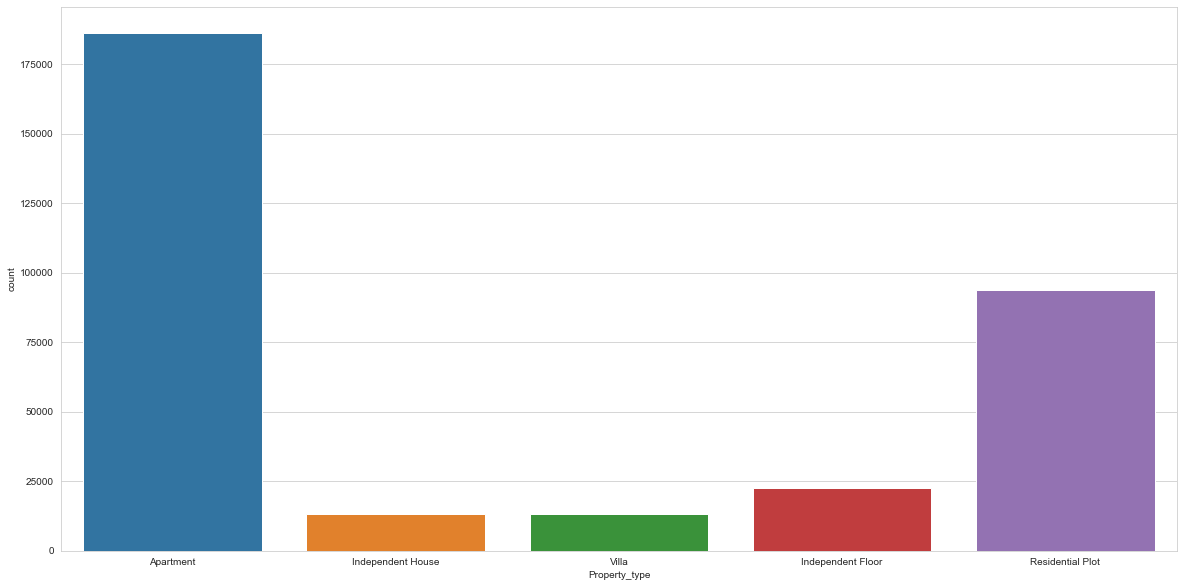

In [91]:
sns.countplot(x='Property_type',data=df)
plt.show()

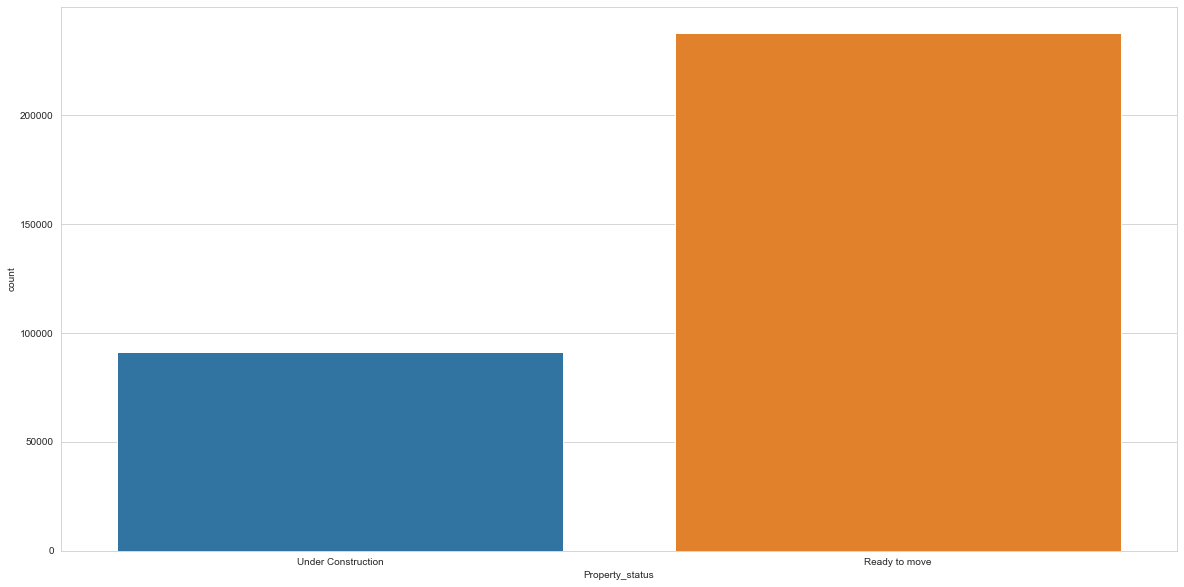

In [92]:
sns.countplot(x='Property_status',data=df)
plt.show()

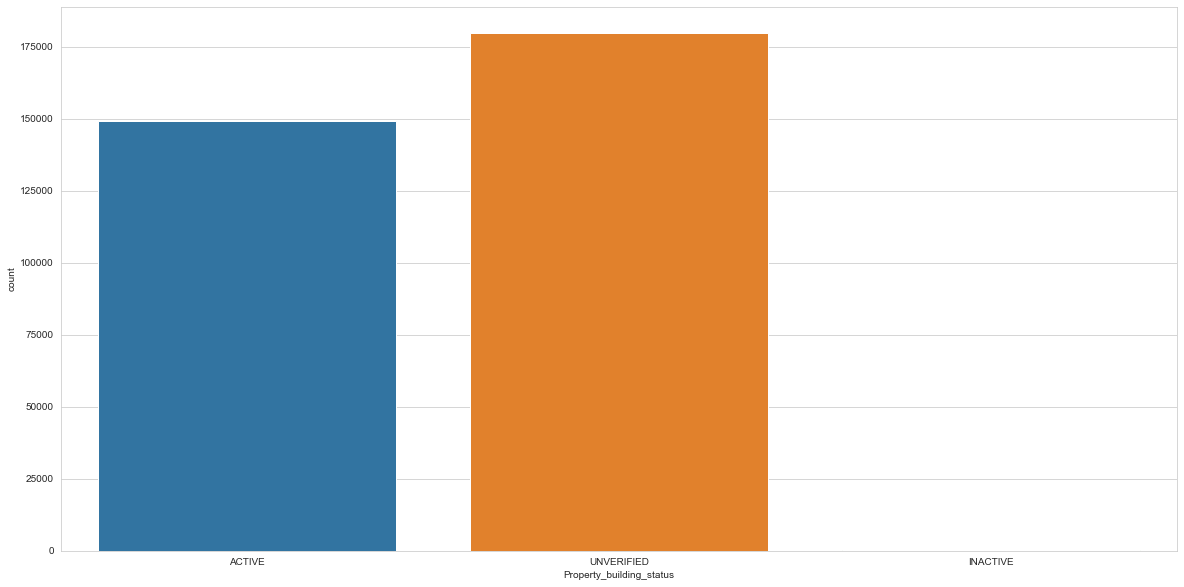

In [93]:
sns.countplot(x='Property_building_status',data=df)
plt.show()

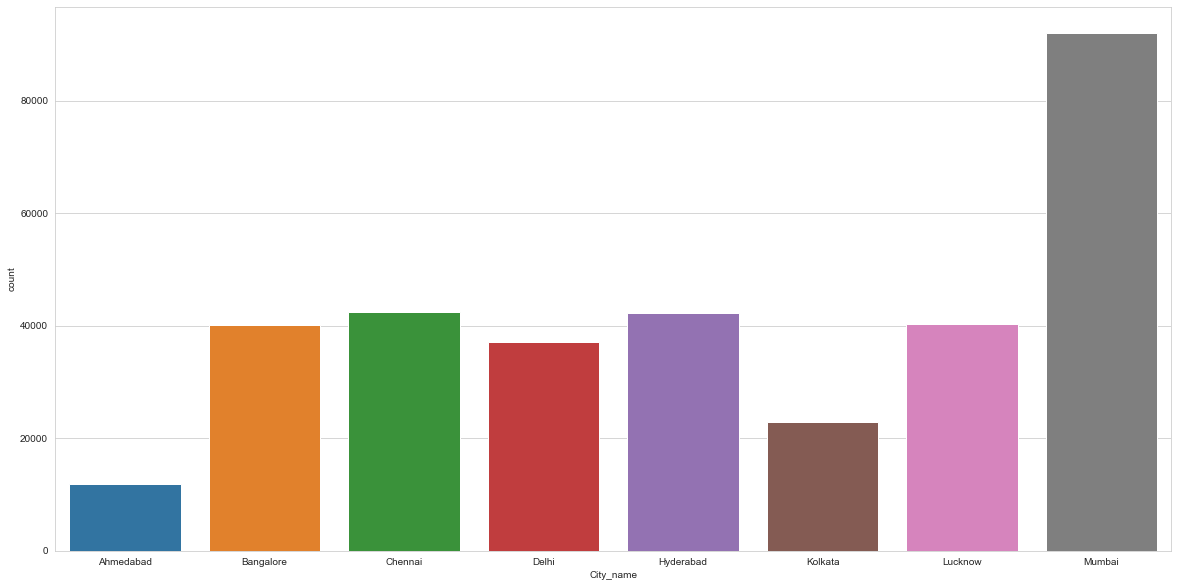

In [94]:
sns.countplot(x='City_name',data=df)
plt.show()


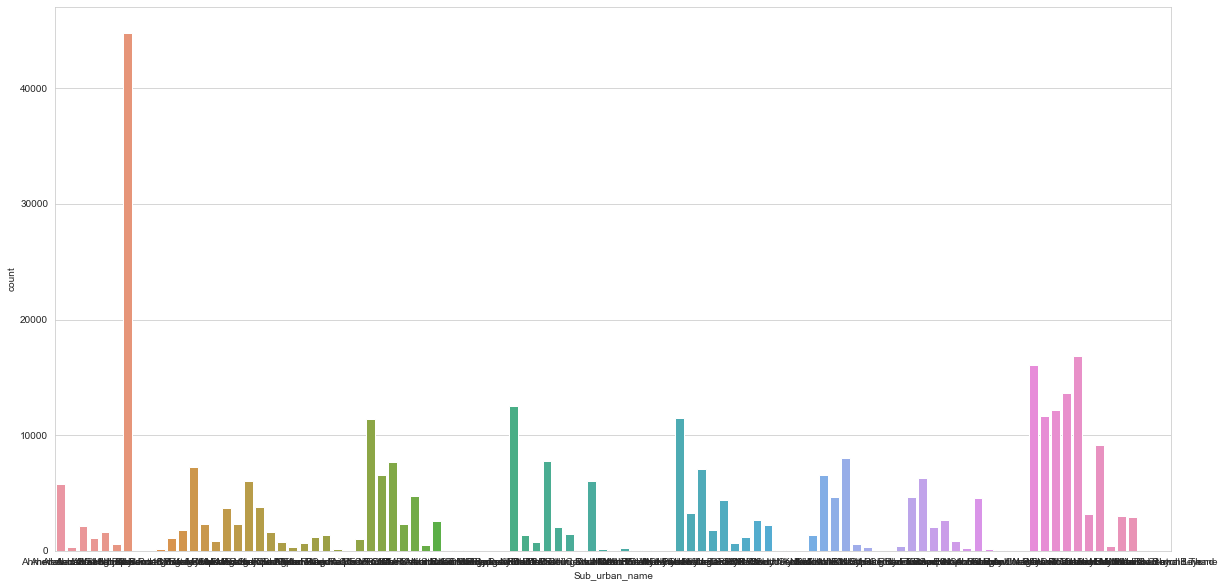

In [95]:
ch = sns.countplot(x='Sub_urban_name',data=df)
plt.show()
ch.set_xticklabels(ch.get_xticklabels(), rotation=180, horizontalalignment='right')

None

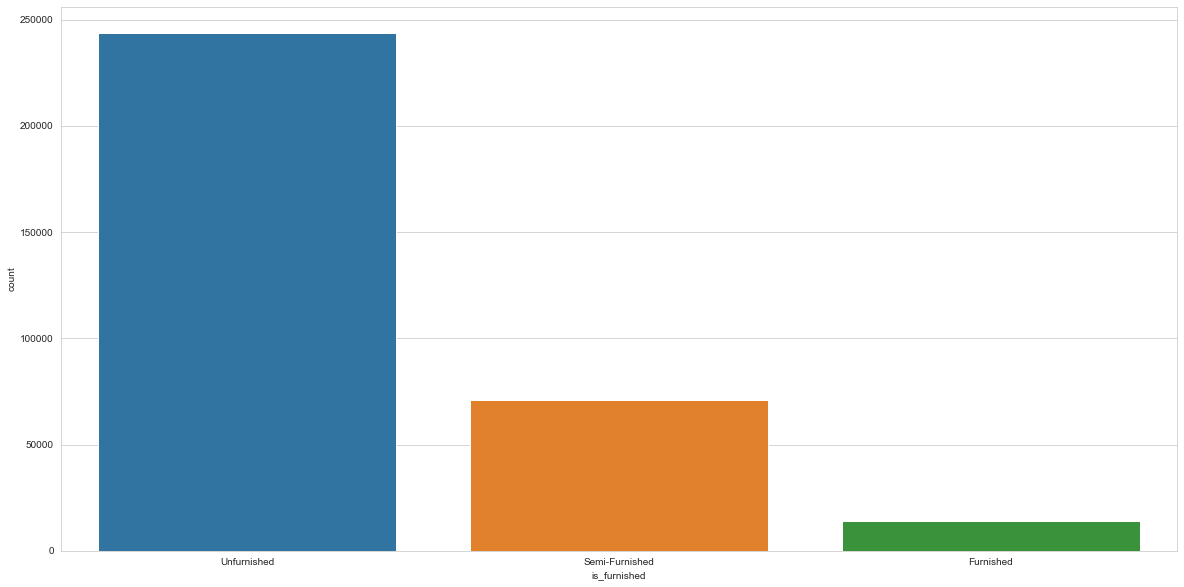

In [96]:
sns.countplot(x='is_furnished',data=df)
plt.show()

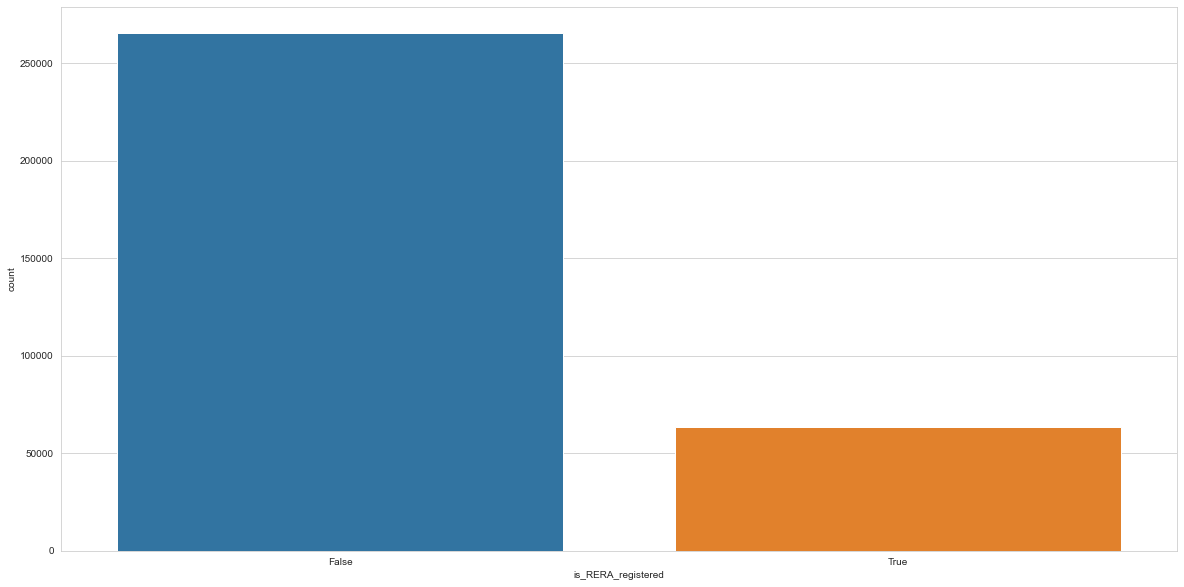

In [97]:
sns.countplot(x='is_RERA_registered',data=df)
plt.show()

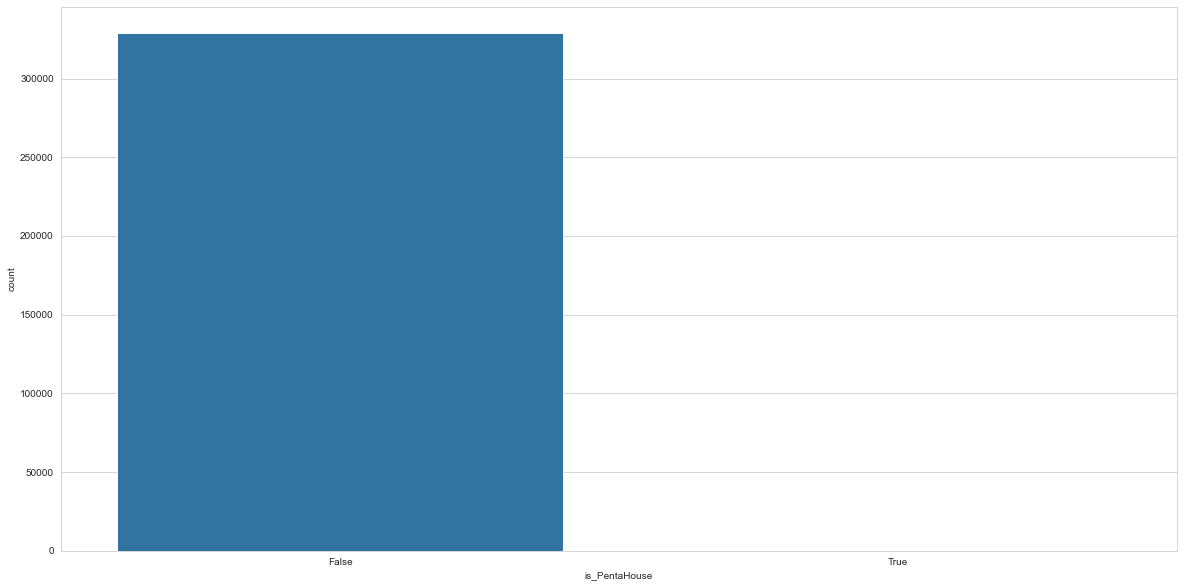

In [98]:
sns.countplot(x='is_PentaHouse',data=df)
plt.show()

In [99]:
df.shape

(329018, 12)

In [100]:
df.dtypes

Property_type                object
Property_status              object
Price_per_unit_area         float64
Property_building_status     object
City_name                    object
No_of_BHK                     int64
Price                         int64
Size                          int64
Sub_urban_name               object
is_furnished                 object
is_RERA_registered             bool
is_PentaHouse                  bool
dtype: object

In [101]:
df.select_dtypes('number').columns

Index(['Price_per_unit_area', 'No_of_BHK', 'Price', 'Size'], dtype='object')

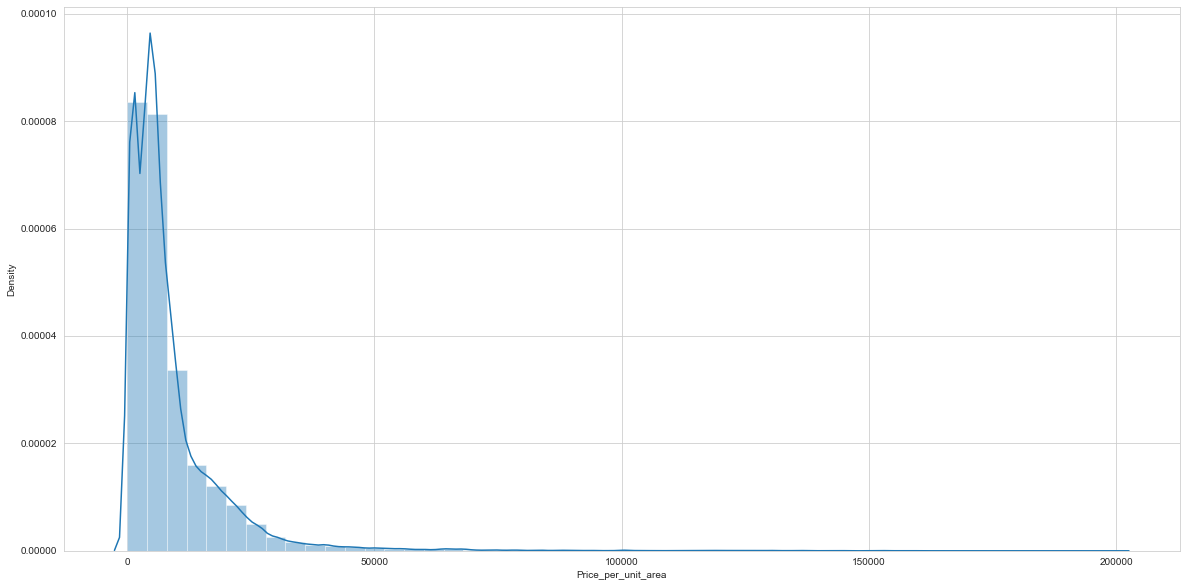

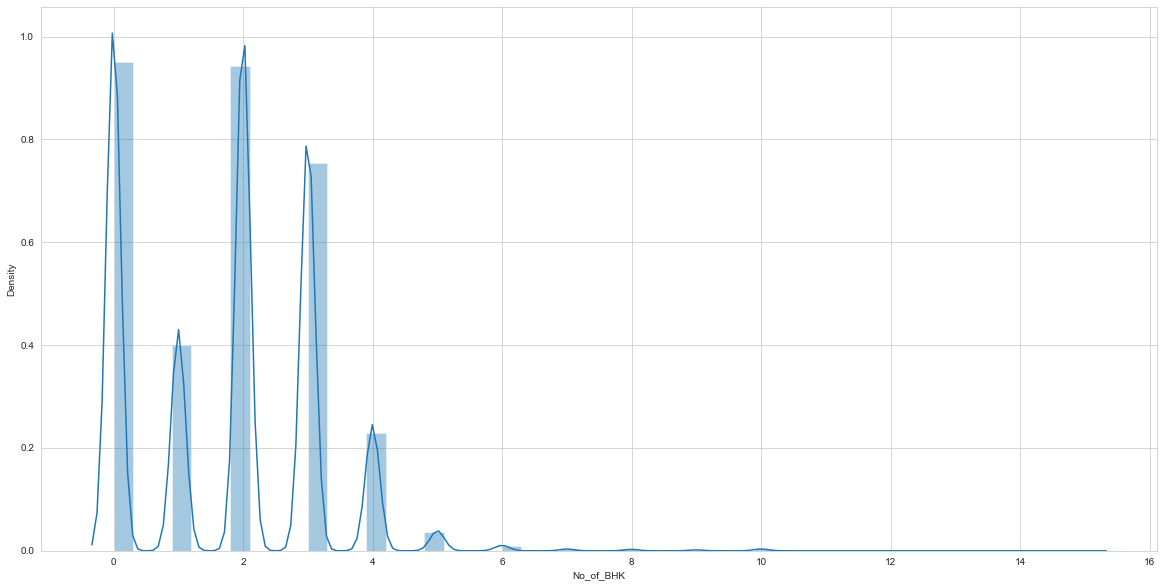

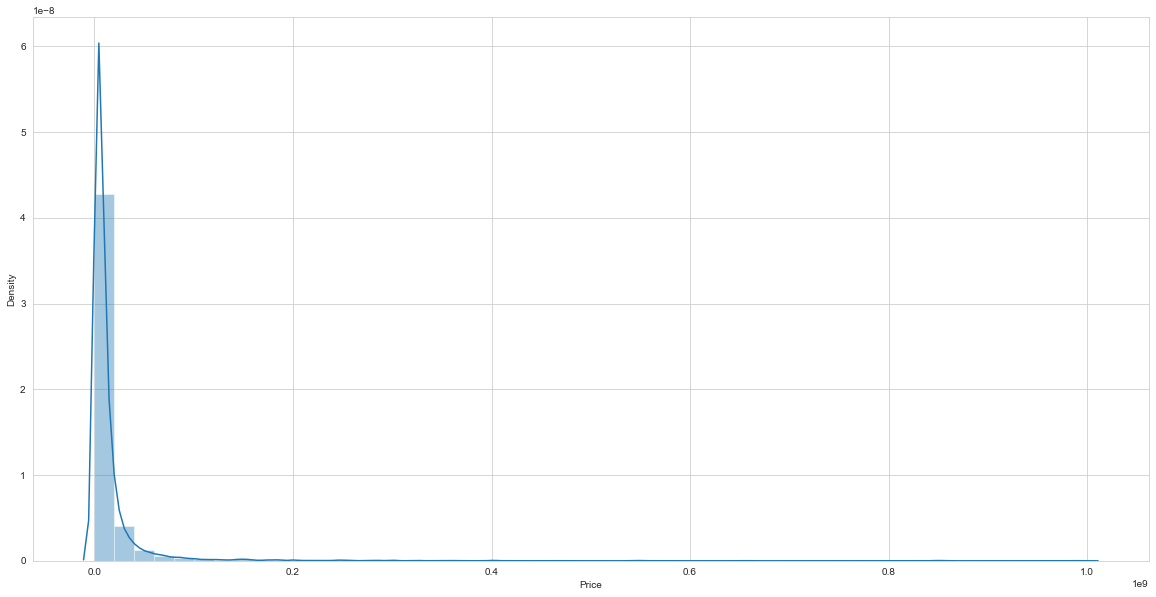

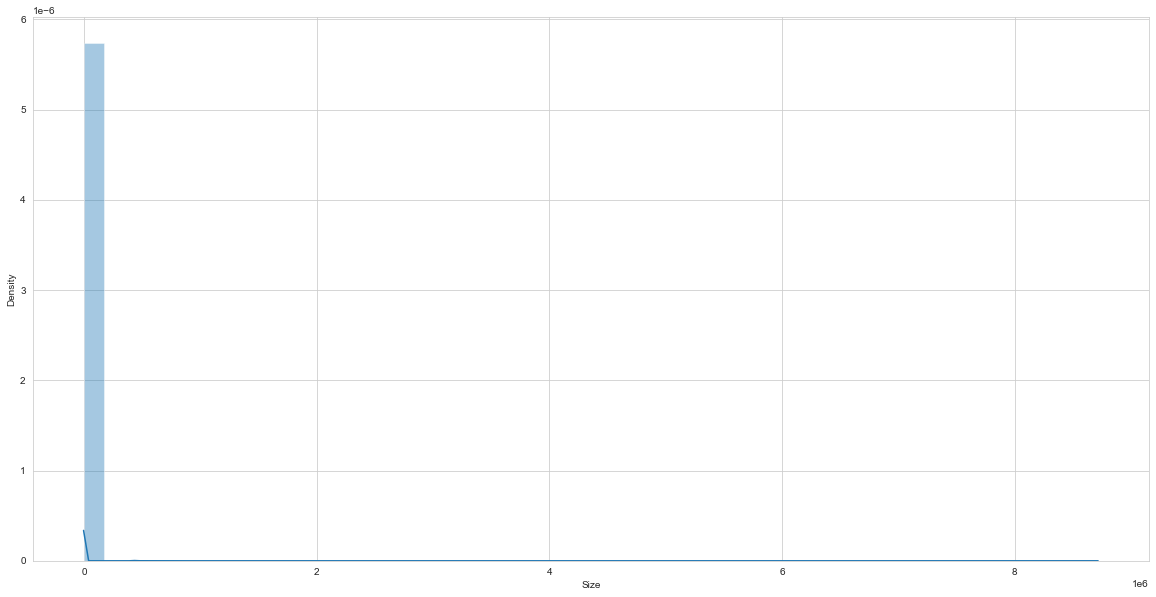

In [102]:
for i in df.select_dtypes('number').columns:
    sns.distplot(df[i])
    plt.show()

In [103]:
df.describe()

,Price_per_unit_area,No_of_BHK,Price,Size
count,329018.000000,329018.000000,3.290180e+05,3.290180e+05
mean,8649.013394,1.740096,1.547327e+07,1.565804e+03
std,10934.314363,1.412159,4.652504e+07,1.919231e+04
min,0.000000,0.000000,3.000000e+03,1.000000e+01
25%,2978.000000,0.000000,2.800000e+06,8.500000e+02
50%,5556.000000,2.000000,6.000000e+06,1.116000e+03
75%,10102.750000,3.000000,1.270000e+07,1.620000e+03
max,200000.000000,15.000000,1.000000e+09,8.712000e+06


In [104]:
# price_per_unit_area cannot be ZERO
# which can be a wrong entry

In [105]:
df[(df['Price_per_unit_area']==0)]

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_PentaHouse
309247,Apartment,Ready to move,0.0,UNVERIFIED,Mumbai,1,5700000,600,Other,Semi-Furnished,False,False


In [106]:
df= df[~(df['Price_per_unit_area']==0)]

In [107]:
df.describe()

,Price_per_unit_area,No_of_BHK,Price,Size
count,329017.000000,329017.000000,3.290170e+05,3.290170e+05
mean,8649.039682,1.740099,1.547330e+07,1.565807e+03
std,10934.320583,1.412161,4.652510e+07,1.919234e+04
min,100.000000,0.000000,3.000000e+03,1.000000e+01
25%,2978.000000,0.000000,2.800000e+06,8.500000e+02
50%,5556.000000,2.000000,6.000000e+06,1.116000e+03
75%,10103.000000,3.000000,1.270000e+07,1.620000e+03
max,200000.000000,15.000000,1.000000e+09,8.712000e+06


In [108]:
df['Property_building_status'].value_counts()

UNVERIFIED    179656
ACTIVE        149237
INACTIVE         124
Name: Property_building_status, dtype: int64

In [109]:
df['is_RERA_registered'].value_counts()

False    265434
True      63583
Name: is_RERA_registered, dtype: int64

In [110]:
df['Property_status'].value_counts()

Ready to move         237830
Under Construction     91187
Name: Property_status, dtype: int64

In [111]:
df['is_PentaHouse'].value_counts()

False    328904
True        113
Name: is_PentaHouse, dtype: int64

In [112]:
df['is_furnished'].value_counts()

Unfurnished       243705
Semi-Furnished     71196
Furnished          14116
Name: is_furnished, dtype: int64

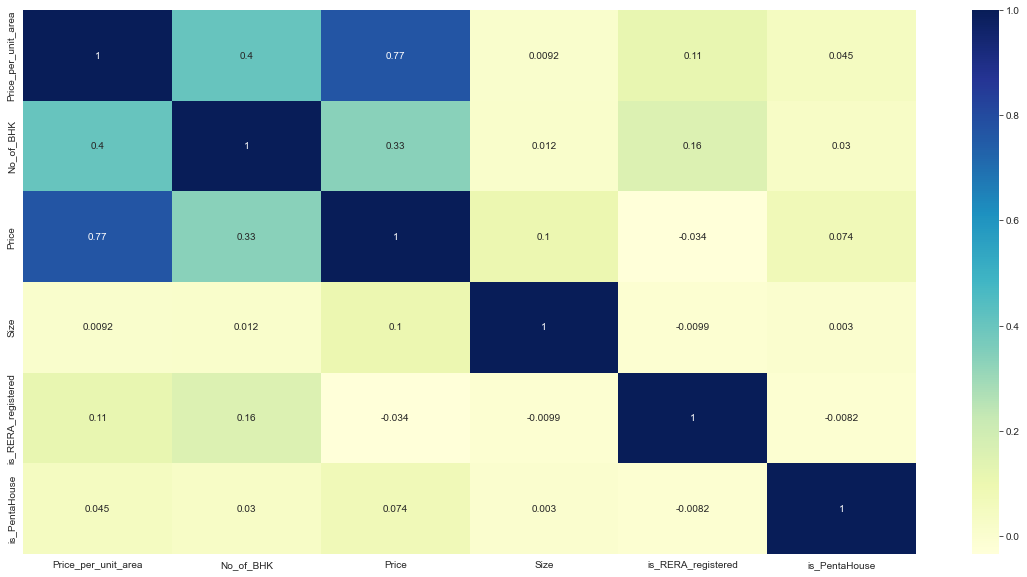

In [113]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

**OUTLIER TREATMENT**

**Price_per_unit_area, Price and Size have considerable outliers.**

**We can drop the outliers as we have sufficient data.**

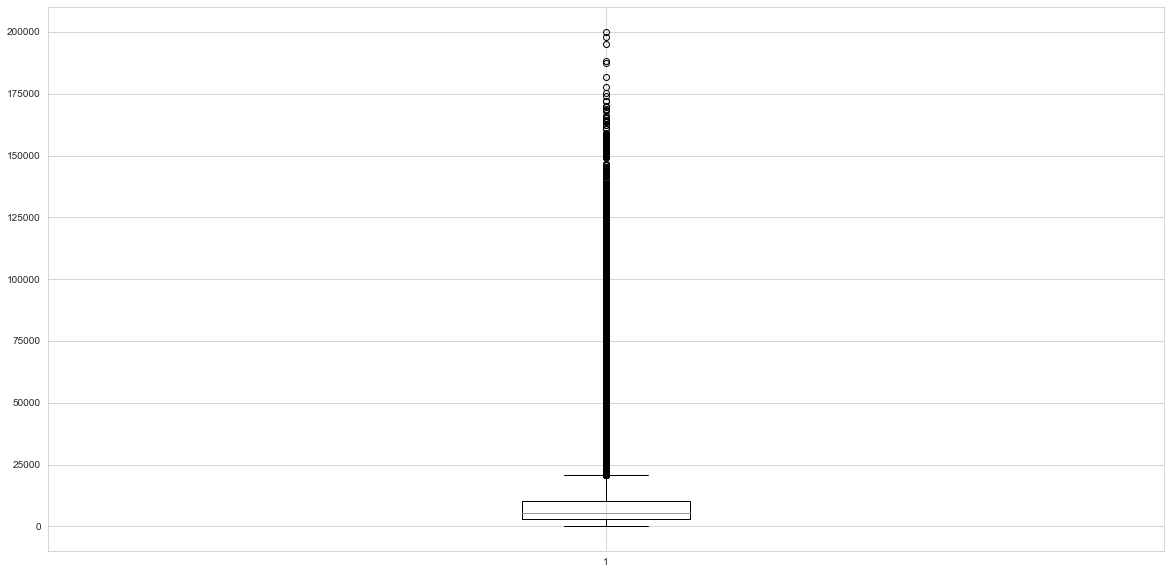

In [114]:
# outlier treatment for 'Price_per_unit_area'
plt.boxplot(df.Price_per_unit_area)
plt.show()

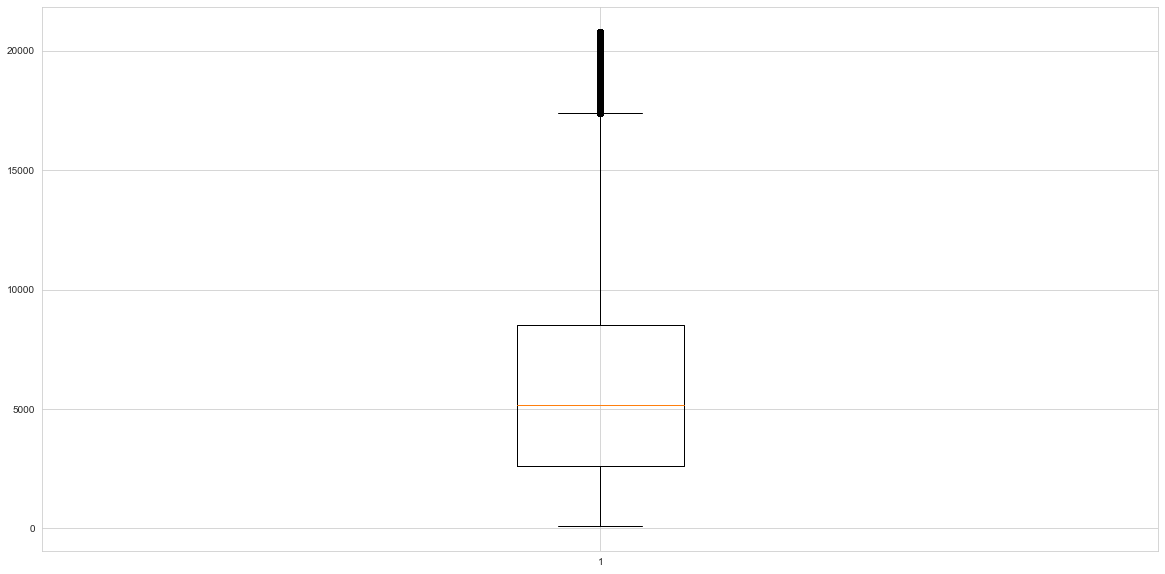

In [115]:
Q1 = df.Price_per_unit_area.quantile(0.25)
Q3 = df.Price_per_unit_area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Price_per_unit_area >= Q1 - 1.5*IQR) & (df.Price_per_unit_area <= Q3 + 1.5*IQR)]

plt.boxplot(df.Price_per_unit_area)
plt.show()

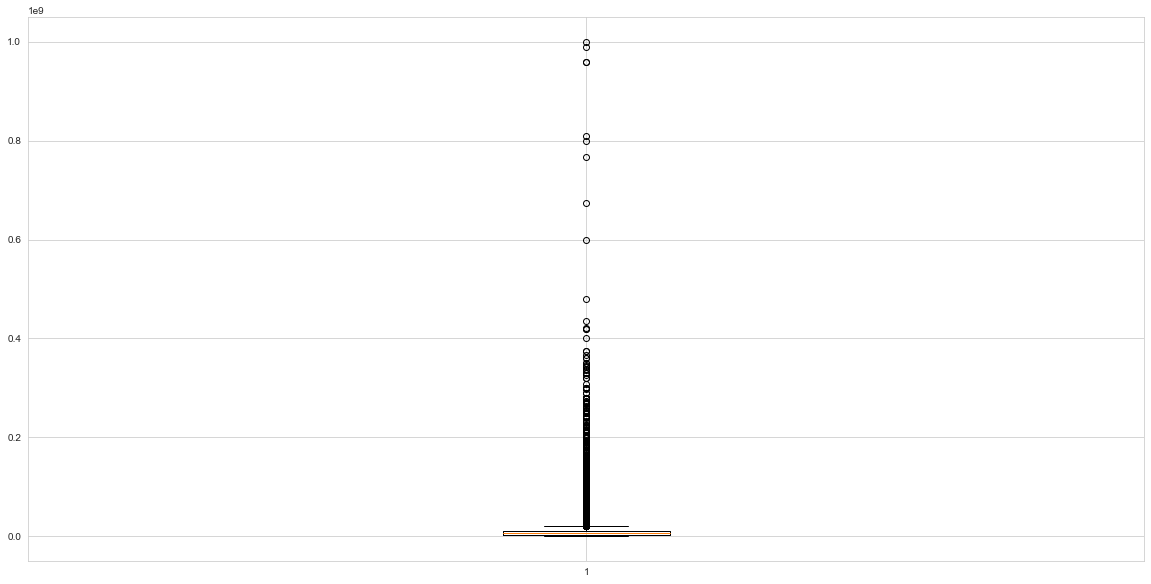

In [116]:
# outlier treatment for 'Price'
plt.boxplot(df.Price)
plt.show()

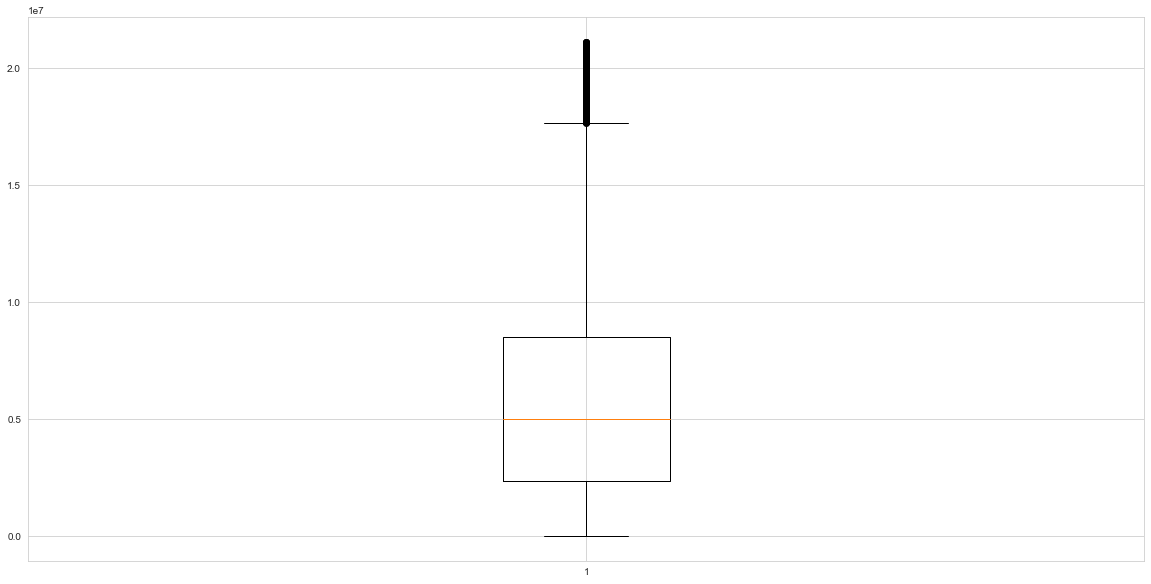

In [117]:
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Price >= Q1 - 1.5*IQR) & (df.Price <= Q3 + 1.5*IQR)]

plt.boxplot(df.Price)
plt.show()

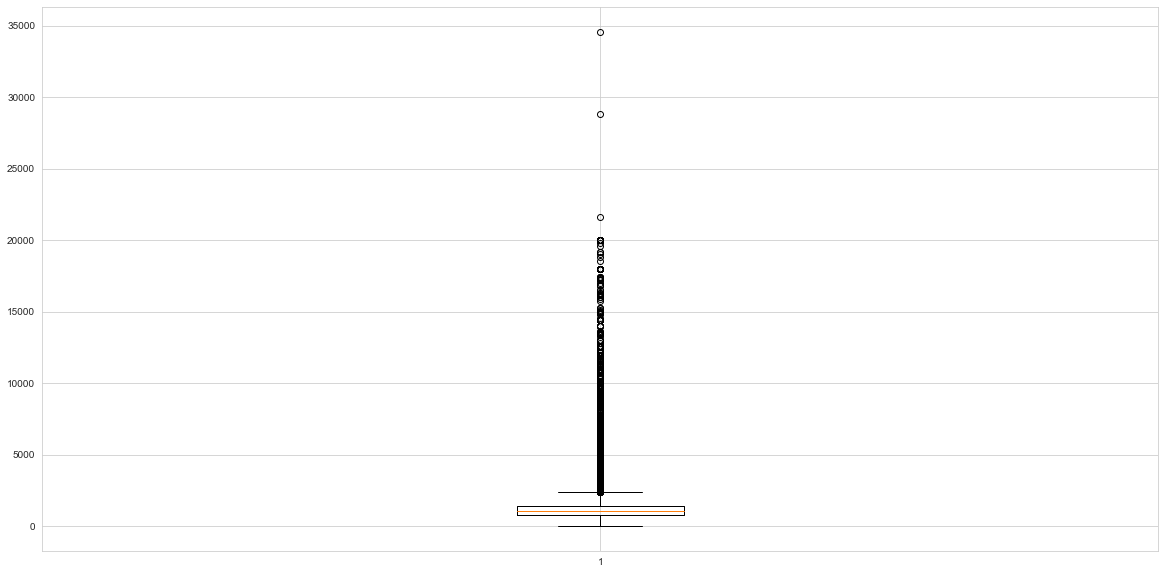

In [118]:
# outlier treatment for 'Size'
plt.boxplot(df.Size)
plt.show()

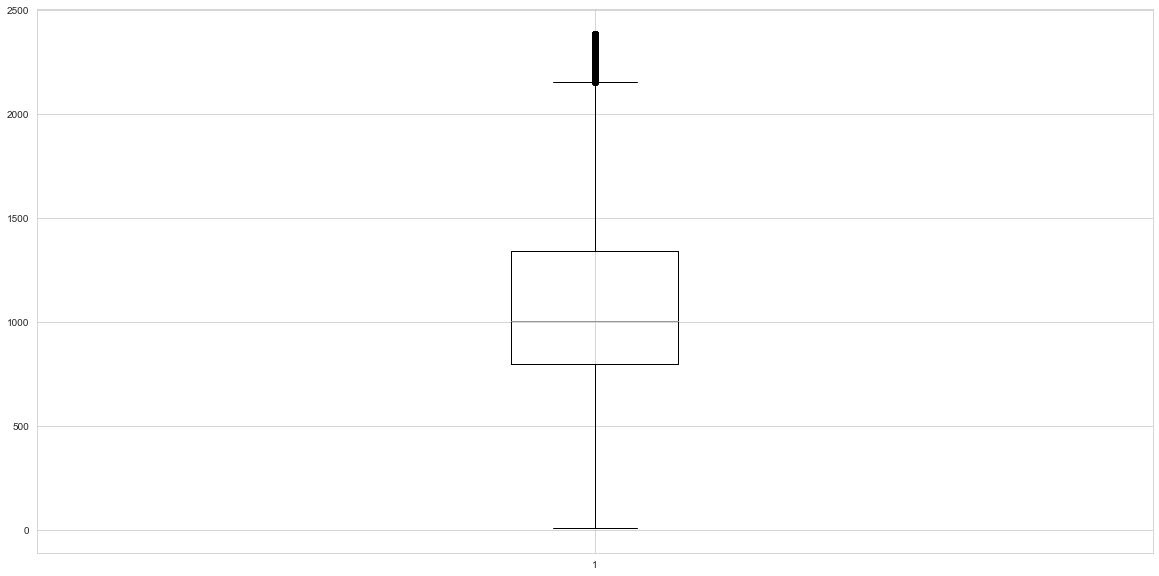

In [119]:
Q1 = df.Size.quantile(0.25)
Q3 = df.Size.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Size >= Q1 - 1.5*IQR) & (df.Size <= Q3 + 1.5*IQR)]

plt.boxplot(df.Size)
plt.show()

In [120]:
df['is_RERA_registered']=df['is_RERA_registered'].astype('object')
df['is_PentaHouse']=df['is_PentaHouse'].astype('object')

In [121]:
df.shape

(262126, 12)

In [122]:
df.dtypes

Property_type                object
Property_status              object
Price_per_unit_area         float64
Property_building_status     object
City_name                    object
No_of_BHK                     int64
Price                         int64
Size                          int64
Sub_urban_name               object
is_furnished                 object
is_RERA_registered           object
is_PentaHouse                object
dtype: object

In [123]:
df

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_PentaHouse
0,Apartment,Under Construction,4285.0,ACTIVE,Ahmedabad,3,7500000,1750,Ahmedabad West,Unfurnished,True,False
2,Apartment,Ready to move,5752.0,ACTIVE,Ahmedabad,3,13200840,2295,Ahmedabad West,Unfurnished,False,False
3,Apartment,Ready to move,2486.0,ACTIVE,Ahmedabad,2,2283000,918,Ahmedabad South,Unfurnished,False,False
4,Apartment,Under Construction,5324.0,ACTIVE,Ahmedabad,3,9371000,1760,Ahmedabad West,Unfurnished,True,False
5,Apartment,Under Construction,2593.0,ACTIVE,Ahmedabad,2,3385000,1305,Ahmedabad South,Unfurnished,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
332091,Apartment,Under Construction,9826.0,ACTIVE,Mumbai,1,3400000,346,Mira Road and Beyond,Unfurnished,True,False
332092,Apartment,Under Construction,8568.0,ACTIVE,Mumbai,1,3650000,426,Mira Road and Beyond,Unfurnished,True,False
332093,Apartment,Under Construction,9861.0,ACTIVE,Mumbai,1,3550000,360,Mira Road and Beyond,Unfurnished,True,False
332094,Apartment,Under Construction,8813.0,ACTIVE,Mumbai,2,5200000,590,Mira Road and Beyond,Unfurnished,True,False


In [124]:
df.columns

Index(['Property_type', 'Property_status', 'Price_per_unit_area',
       'Property_building_status', 'City_name', 'No_of_BHK', 'Price', 'Size',
       'Sub_urban_name', 'is_furnished', 'is_RERA_registered',
       'is_PentaHouse'],
      dtype='object')

**OneHotEncoder – For Label categorical features**

In [125]:
import statsmodels.api as sm

In [126]:
x=df.drop('Price',axis=1)
y=df.Price
x=pd.get_dummies(x,drop_first=True)
x['cons']=1

In [127]:
model=sm.OLS(y,x).fit()

In [128]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.422e+04
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:42:02   Log-Likelihood:            -4.0698e+06
No. Observations:              262126   AIC:                         8.140e+06
Df Residuals:                  262006   BIC:                         8.141e+06
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Price_per_unit_area                               896.9889      1.164    770.924      0.000     894.708     899.269
No_of_BHK                                        9.426e+05   6216.324    151.630      0.000     9.3e+05    9.55e+05
Size                                             4967.2277     10.048    494.361      0.000    4947.534    4986.921
Property_type_Independent Floor                 -6.684e+05   1.69e+04    -39.514      0.000   -7.02e+05   -6.35e+05
Property_type_Independent House                 -3.065e+05   1.61e+04    -19.050      0.000   -3.38e+05   -2.75e+05
Property_type_Residential Plot                   9.554e+05   1.78e+04     53.734      0.000    9.21e+05     9.9e+05
Property_type_Villa                             -3.765e+05   1.73e+04    -21.821      0.000    -4.1e+05   -3.43e+05
Property_status_Under Construction              -7.906e+04   1.12e+04     -7.075      0.000   -1.01e+05   -5.72e+04
Property_building_status_INACTIVE               -7.335e+04   1.28e+05     -0.574      0.566   -3.24e+05    1.77e+05
Property_building_status_UNVERIFIED             -9.022e+04   8052.907    -11.204      0.000   -1.06e+05   -7.44e+04
City_name_Bangalore                              1.346e+05   9.81e+04      1.372      0.170   -5.77e+04    3.27e+05
City_name_Chennai                                 3.41e+05   9.78e+04      3.487      0.000    1.49e+05    5.33e+05
City_name_Delhi                                  1.238e+06   9.87e+04     12.551      0.000    1.05e+06    1.43e+06
City_name_Hyderabad                              -1.13e+06   9.74e+04    -11.605      0.000   -1.32e+06   -9.39e+05
City_name_Kolkata                               -4.668e+05   1.03e+05     -4.522      0.000   -6.69e+05   -2.64e+05
City_name_Lucknow                               -3.912e+04   9.66e+04     -0.405      0.686   -2.28e+05     1.5e+05
City_name_Mumbai                                -1433.4790      1e+05     -0.014      0.989   -1.97e+05    1.95e+05
Sub_urban_name_Ahmedabad East                    -3.71e+05   7.48e+04     -4.956      0.000   -5.18e+05   -2.24e+05
Sub_urban_name_Ahmedabad North                  -5.574e+05   6.88e+04     -8.107      0.000   -6.92e+05   -4.23e+05
Sub_urban_name_Ahmedabad South                  -2.375e+05      1e+05     -2.373      0.018   -4.34e+05   -4.13e+04
Sub_urban_name_Ahmedabad West                   -3.001e+05   6.51e+04     -4.608      0.000   -4.28e+05   -1.72e+05
Sub_urban_name_Alambagh                          2.727e+05   1.16e+05      2.352      0.019    4.54e+04       5e+05
Sub_urban_name_Andheri to Dahisar               -7.972e+05   1.19e+05     -6.724      0.000   -1.03e+06   -5.65e+05
Sub_urban_name_Arcot Road  Saligramam            2.745e+05   2.51e+

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = x
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                             feature         VIF
0                Price_per_unit_area    3.701914
1                          No_of_BHK    8.017027
2                               Size    2.637920
3    Property_type_Independent Floor    1.938276
4    Property_type_Independent House    1.185258
..                               ...         ...
115      is_furnished_Semi-Furnished    5.602790
116         is_furnished_Unfurnished    6.004452
117          is_RERA_registered_True    4.013846
118               is_PentaHouse_True    1.003099
119                             cons  606.083308

[120 rows x 2 columns]


In [130]:
vif_data[vif_data['VIF']>10]

,feature,VIF
10,City_name_Bangalore,155.316859
11,City_name_Chennai,173.534597
12,City_name_Delhi,113.559726
13,City_name_Hyderabad,158.691588
14,City_name_Kolkata,115.324687
15,City_name_Lucknow,167.927212
16,City_name_Mumbai,276.176979
21,Sub_urban_name_Alambagh,31.869199
22,Sub_urban_name_Andheri to Dahisar,57.798625
25,Sub_urban_name_Bangalore East,24.640221


In [131]:
x=df.drop(['Price','Sub_urban_name'],axis=1)
y=df.Price
x=pd.get_dummies(x,drop_first=True)
x['cons']=1

In [132]:
model1=sm.OLS(y,x).fit()

In [133]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.256e+05
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:51:45   Log-Likelihood:            -4.0805e+06
No. Observations:              262126   AIC:                         8.161e+06
Df Residuals:                  262104   BIC:                         8.161e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Price_per_unit_area                   861.7078      0.960    897.198      0.000     859.825     863.590
No_of_BHK                            9.834e+05   6392.759    153.836      0.000    9.71e+05    9.96e+05
Size                                 5028.8663     10.061    499.819      0.000    5009.146    5048.586
Property_type_Independent Floor      -1.08e+06   1.65e+04    -65.457      0.000   -1.11e+06   -1.05e+06
Property_type_Independent House     -3.909e+05   1.65e+04    -23.722      0.000   -4.23e+05   -3.59e+05
Property_type_Residential Plot       6.913e+05    1.8e+04     38.315      0.000    6.56e+05    7.27e+05
Property_type_Villa                 -5.531e+05   1.77e+04    -31.227      0.000   -5.88e+05   -5.18e+05
Property_status_Under Construction  -1.217e+04   1.14e+04     -1.067      0.286   -3.45e+04    1.02e+04
Property_building_status_INACTIVE   -1.018e+05   1.33e+05     -0.766      0.444   -3.63e+05    1.59e+05
Property_building_status_UNVERIFIED -8.735e+04   8009.526    -10.906      0.000   -1.03e+05   -7.17e+04
City_name_Bangalore                  8.211e+05   1.74e+04     47.169      0.000    7.87e+05    8.55e+05
City_name_Chennai                    9.246e+05   1.77e+04     52.299      0.000     8.9e+05    9.59e+05
City_name_Delhi                      1.659e+06   2.02e+04     82.059      0.000    1.62e+06     1.7e+06
City_name_Hyderabad                 -3.265e+05   1.77e+04    -18.417      0.000   -3.61e+05   -2.92e+05
City_name_Kolkata                    2.687e+05   1.84e+04     14.613      0.000    2.33e+05    3.05e+05
City_name_Lucknow                    7.244e+05   1.86e+04     38.886      0.000    6.88e+05    7.61e+05
City_name_Mumbai                     5.055e+05   1.79e+04     28.284      0.000     4.7e+05    5.41e+05
is_furnished_Semi-Furnished         -6.258e+04   1.59e+04     -3.945      0.000   -9.37e+04   -3.15e+04
is_furnished_Unfurnished            -1.305e+05   1.55e+04     -8.410      0.000   -1.61e+05      -1e+05
is_RERA_registered_True             -3.134e+05   1.37e+04    -22.914      0.000    -3.4e+05   -2.87e+05
is_PentaHouse_True                  -4.176e+05   2.69e+05     -1.555      0.120   -9.44e+05    1.09e+05
cons                                -6.512e+06   2.42e+04   -268.616      0.000   -6.56e+06   -6.46e+06
==============================================================================
Omnibus:                    19721.792   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81239.035
Skew:                          -0.279   Prob(JB):                         0.00
Kurtosis:                       5.670   Cond. No.                     7.11e+05
==============================================================================

Notes:
[

In [134]:
X = x
  
# VIF dataframe
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X.columns
  
# calculating VIF for each feature
vif_data1["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data1)

                                feature        VIF
0                   Price_per_unit_area   2.325873
1                             No_of_BHK   7.817904
2                                  Size   2.438957
3       Property_type_Independent Floor   1.700802
4       Property_type_Independent House   1.146355
5        Property_type_Residential Plot   9.409755
6                   Property_type_Villa   1.173267
7    Property_status_Under Construction   3.536707
8     Property_building_status_INACTIVE   1.001031
9   Property_building_status_UNVERIFIED   2.139271
10                  City_name_Bangalore   4.508415
11                    City_name_Chennai   5.231284
12                      City_name_Delhi   4.397494
13                  City_name_Hyderabad   4.852101
14                    City_name_Kolkata   3.373291
15                    City_name_Lucknow   5.756078
16                     City_name_Mumbai   8.135273
17          is_furnished_Semi-Furnished   5.560586
18             is_furnished_Unf

In [135]:
#Scaling the data

In [136]:
df1=df.drop('Sub_urban_name',axis=1)

In [137]:
df1

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,is_furnished,is_RERA_registered,is_PentaHouse
0,Apartment,Under Construction,4285.0,ACTIVE,Ahmedabad,3,7500000,1750,Unfurnished,True,False
2,Apartment,Ready to move,5752.0,ACTIVE,Ahmedabad,3,13200840,2295,Unfurnished,False,False
3,Apartment,Ready to move,2486.0,ACTIVE,Ahmedabad,2,2283000,918,Unfurnished,False,False
4,Apartment,Under Construction,5324.0,ACTIVE,Ahmedabad,3,9371000,1760,Unfurnished,True,False
5,Apartment,Under Construction,2593.0,ACTIVE,Ahmedabad,2,3385000,1305,Unfurnished,True,False
...,...,...,...,...,...,...,...,...,...,...,...
332091,Apartment,Under Construction,9826.0,ACTIVE,Mumbai,1,3400000,346,Unfurnished,True,False
332092,Apartment,Under Construction,8568.0,ACTIVE,Mumbai,1,3650000,426,Unfurnished,True,False
332093,Apartment,Under Construction,9861.0,ACTIVE,Mumbai,1,3550000,360,Unfurnished,True,False
332094,Apartment,Under Construction,8813.0,ACTIVE,Mumbai,2,5200000,590,Unfurnished,True,False


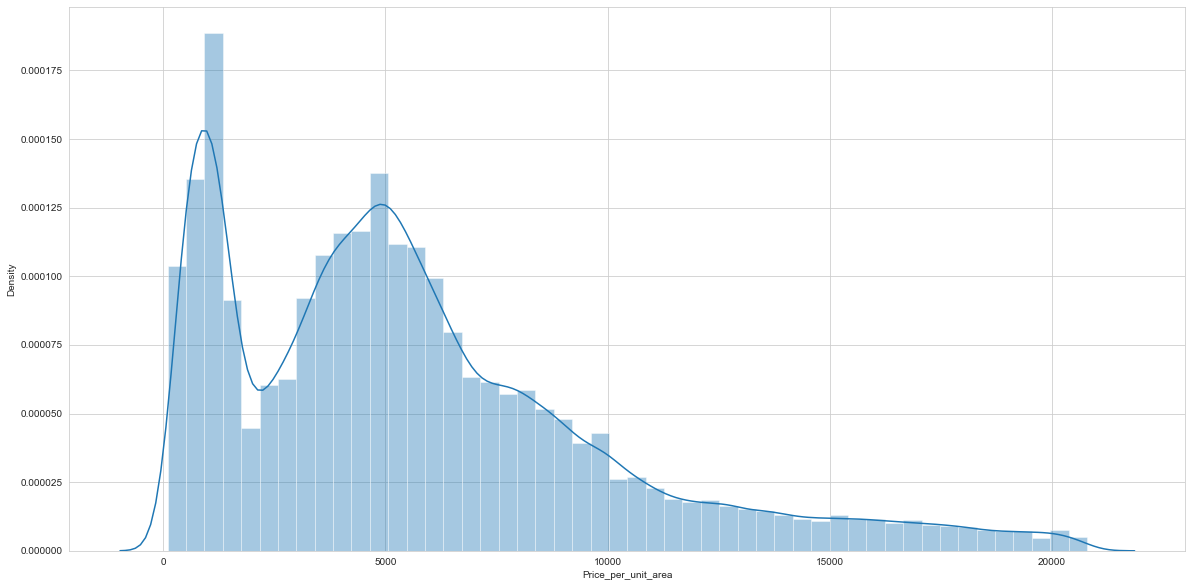

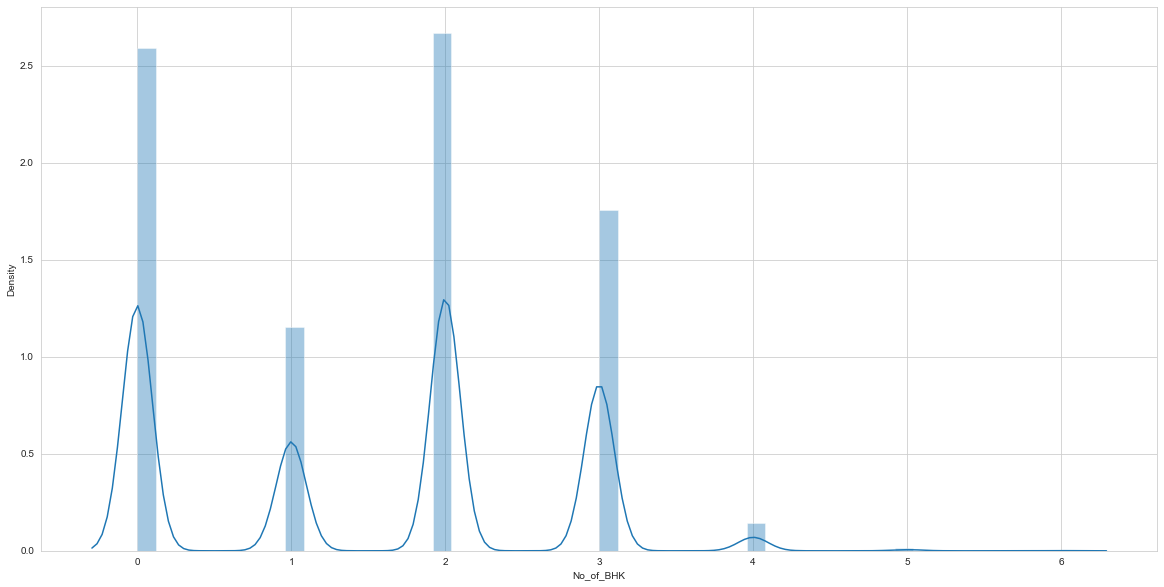

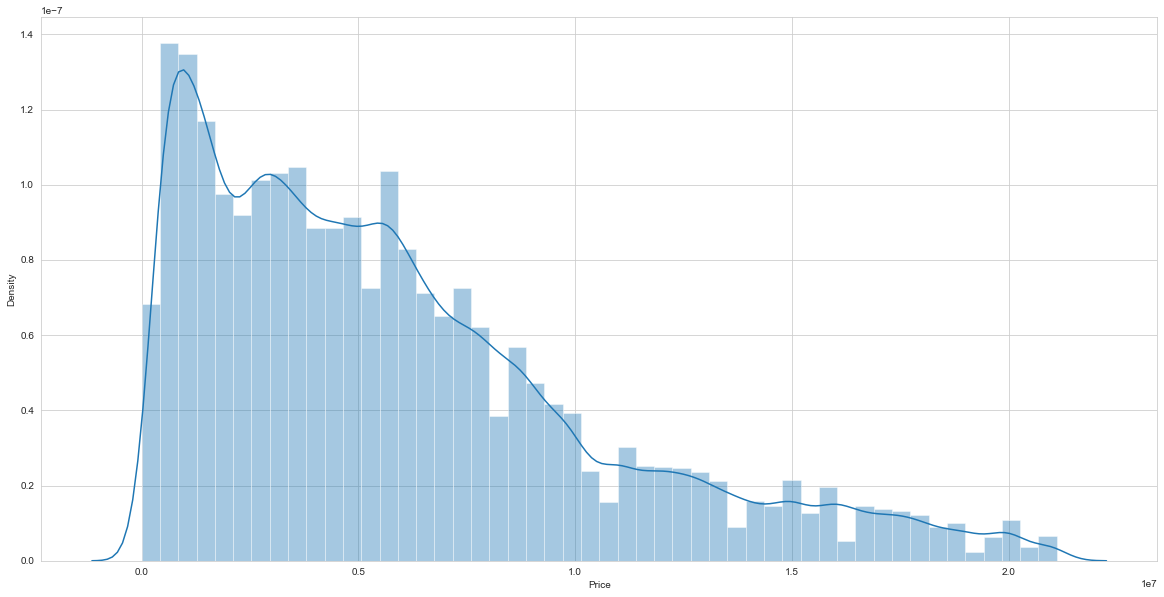

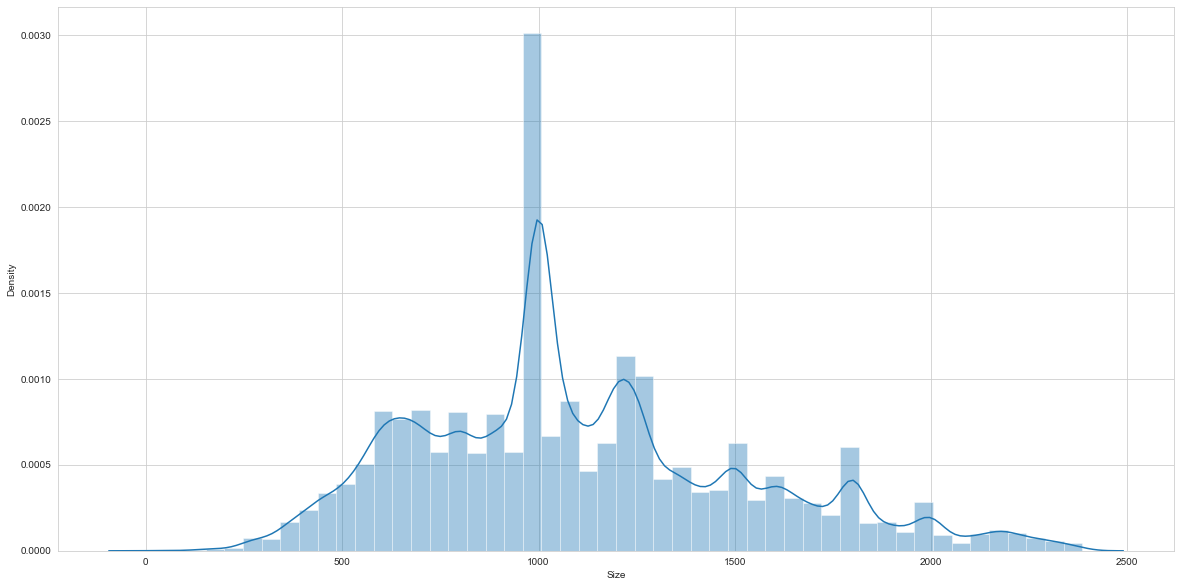

In [138]:
for i in df1.select_dtypes('number').columns:
    sns.distplot(df1[i])
    plt.show()

In [139]:
df1.skew()

Price_per_unit_area     1.128349
No_of_BHK               0.045701
Price                   1.066420
Size                    0.576844
is_RERA_registered      1.583875
is_PentaHouse          98.516402
dtype: float64

In [140]:
# apply transformations on Price,price per unit area are right skew- sqrt transformation


In [141]:
df1_sqrt=np.sqrt(df1[['Price_per_unit_area','Price']])

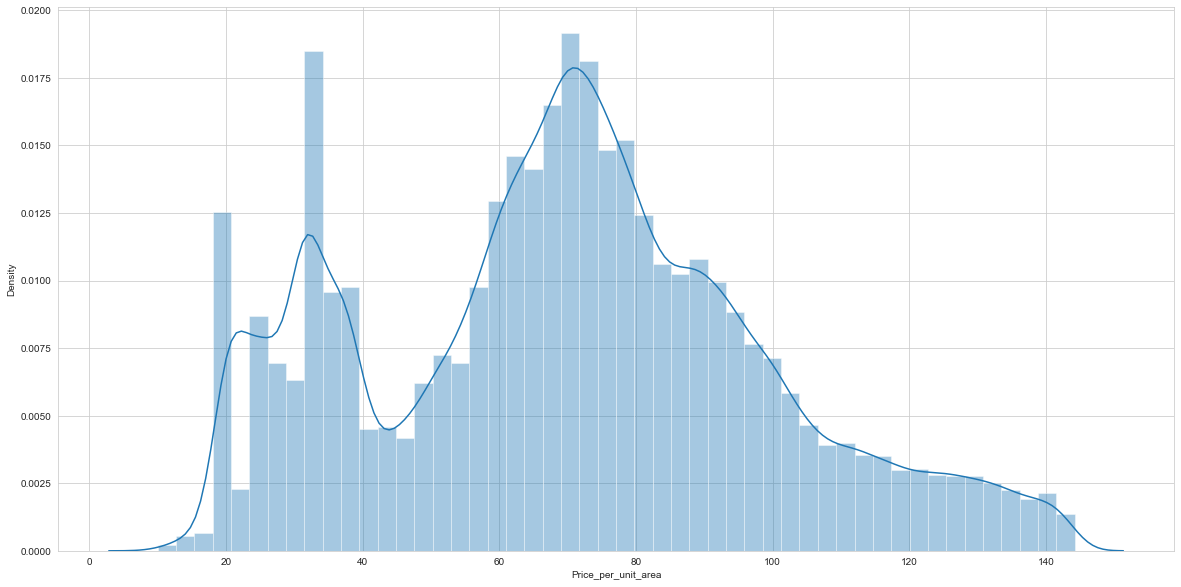

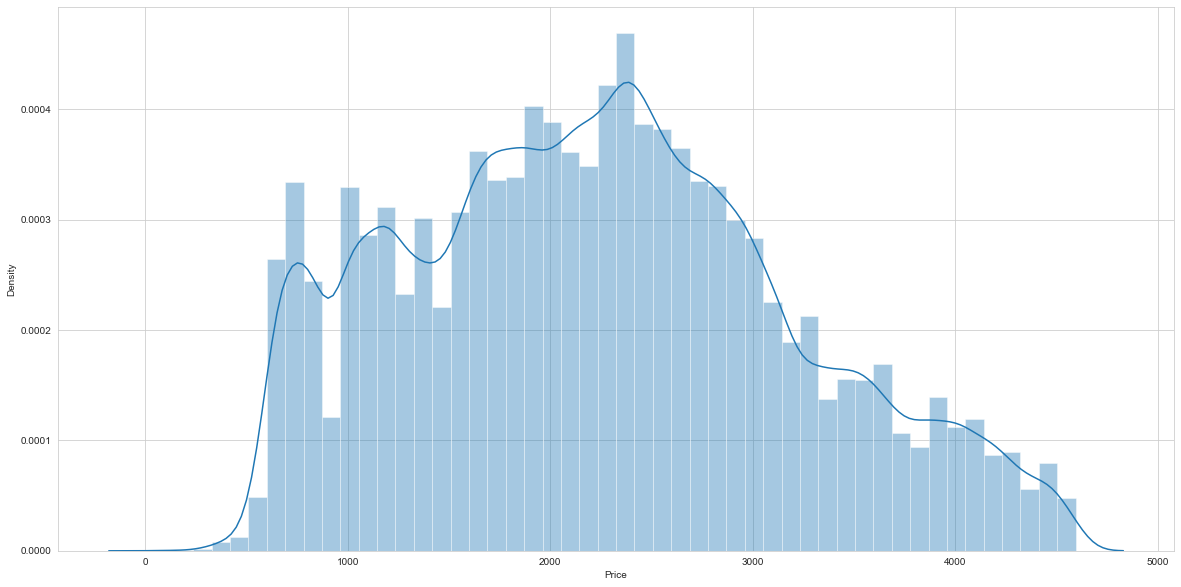

In [142]:
for i in df1_sqrt.columns:
    sns.distplot(df1_sqrt[i])
    plt.show()

In [143]:
df1['Price_per_unit_area']=np.sqrt(df1['Price_per_unit_area'])
df1['Price']=np.sqrt(df1['Price'])

In [144]:
df1

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,is_furnished,is_RERA_registered,is_PentaHouse
0,Apartment,Under Construction,65.459911,ACTIVE,Ahmedabad,3,2738.612788,1750,Unfurnished,True,False
2,Apartment,Ready to move,75.841941,ACTIVE,Ahmedabad,3,3633.296024,2295,Unfurnished,False,False
3,Apartment,Ready to move,49.859803,ACTIVE,Ahmedabad,2,1510.959960,918,Unfurnished,False,False
4,Apartment,Under Construction,72.965745,ACTIVE,Ahmedabad,3,3061.208912,1760,Unfurnished,True,False
5,Apartment,Under Construction,50.921508,ACTIVE,Ahmedabad,2,1839.836949,1305,Unfurnished,True,False
...,...,...,...,...,...,...,...,...,...,...,...
332091,Apartment,Under Construction,99.126182,ACTIVE,Mumbai,1,1843.908891,346,Unfurnished,True,False
332092,Apartment,Under Construction,92.563492,ACTIVE,Mumbai,1,1910.497317,426,Unfurnished,True,False
332093,Apartment,Under Construction,99.302568,ACTIVE,Mumbai,1,1884.144368,360,Unfurnished,True,False
332094,Apartment,Under Construction,93.877580,ACTIVE,Mumbai,2,2280.350850,590,Unfurnished,True,False


In [149]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [150]:
scaled_df1 = df1

In [151]:
scaled_df1

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,is_furnished,is_RERA_registered,is_PentaHouse
0,Apartment,Under Construction,65.459911,ACTIVE,Ahmedabad,3,2738.612788,1750,Unfurnished,True,False
2,Apartment,Ready to move,75.841941,ACTIVE,Ahmedabad,3,3633.296024,2295,Unfurnished,False,False
3,Apartment,Ready to move,49.859803,ACTIVE,Ahmedabad,2,1510.959960,918,Unfurnished,False,False
4,Apartment,Under Construction,72.965745,ACTIVE,Ahmedabad,3,3061.208912,1760,Unfurnished,True,False
5,Apartment,Under Construction,50.921508,ACTIVE,Ahmedabad,2,1839.836949,1305,Unfurnished,True,False
...,...,...,...,...,...,...,...,...,...,...,...
332091,Apartment,Under Construction,99.126182,ACTIVE,Mumbai,1,1843.908891,346,Unfurnished,True,False
332092,Apartment,Under Construction,92.563492,ACTIVE,Mumbai,1,1910.497317,426,Unfurnished,True,False
332093,Apartment,Under Construction,99.302568,ACTIVE,Mumbai,1,1884.144368,360,Unfurnished,True,False
332094,Apartment,Under Construction,93.877580,ACTIVE,Mumbai,2,2280.350850,590,Unfurnished,True,False


In [154]:
#Standard scale No_of_BHK, Price_per_unit_area, Size
scaled_df1['No_of_BHK']=sc.fit_transform(df1[['No_of_BHK']])
scaled_df1['Price_per_unit_area']=sc.fit_transform(df1[['Price_per_unit_area']])
scaled_df1['Size']=sc.fit_transform(df1[['Size']])

In [156]:
df_2=scaled_df1

In [167]:
x=df_2.drop(['Price'],axis=1)
y=df_2.Price
x=pd.get_dummies(x,drop_first=True)
x['cons']=1

In [168]:
x

,Price_per_unit_area,No_of_BHK,Size,Property_type_Independent Floor,Property_type_Independent House,Property_type_Residential Plot,Property_type_Villa,Property_status_Under Construction,Property_building_status_INACTIVE,Property_building_status_UNVERIFIED,City_name_Bangalore,City_name_Chennai,City_name_Delhi,City_name_Hyderabad,City_name_Kolkata,City_name_Lucknow,City_name_Mumbai,is_furnished_Semi-Furnished,is_furnished_Unfurnished,is_RERA_registered_True,is_PentaHouse_True,cons
0,-0.151063,1.268093,1.527082,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,0.209134,1.268093,2.816327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,-0.692298,0.428582,-0.441085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.109347,1.268093,1.550738,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1
5,-0.655463,0.428582,0.474397,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332091,1.016966,-0.410929,-1.794200,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1
332092,0.789277,-0.410929,-1.604953,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1
332093,1.023085,-0.410929,-1.761082,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1
332094,0.834869,0.428582,-1.216997,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1


In [170]:
model_final=sm.OLS(y,x).fit()

In [171]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 3.911e+05
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:31:53   Log-Likelihood:            -1.7143e+06
No. Observations:              262126   AIC:                         3.429e+06
Df Residuals:                  262104   BIC:                         3.429e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Price_per_unit_area                   860.2742      0.579   1484.512      0.000     859.138     861.410
No_of_BHK                             168.4986      0.915    184.241      0.000     166.706     170.291
Size                                  402.1037      0.511    787.324      0.000     401.103     403.105
Property_type_Independent Floor      -123.0398      1.982    -62.072      0.000    -126.925    -119.155
Property_type_Independent House       -69.4937      1.979    -35.112      0.000     -73.373     -65.615
Property_type_Residential Plot        141.3672      2.189     64.569      0.000     137.076     145.658
Property_type_Villa                   -90.3752      2.128    -42.465      0.000     -94.546     -86.204
Property_status_Under Construction      9.0376      1.370      6.599      0.000       6.353      11.722
Property_building_status_INACTIVE      -5.3911     15.981     -0.337      0.736     -36.714      25.932
Property_building_status_UNVERIFIED    -9.4156      0.963     -9.782      0.000     -11.302      -7.529
City_name_Bangalore                    99.4436      2.097     47.423      0.000      95.334     103.554
City_name_Chennai                     101.8244      2.130     47.808      0.000      97.650     105.999
City_name_Delhi                        98.6602      2.431     40.578      0.000      93.895     103.426
City_name_Hyderabad                   -44.3861      2.129    -20.843      0.000     -48.560     -40.212
City_name_Kolkata                      15.2370      2.209      6.899      0.000      10.908      19.566
City_name_Lucknow                      86.9106      2.242     38.766      0.000      82.517      91.305
City_name_Mumbai                        2.3713      2.143      1.107      0.268      -1.828       6.571
is_furnished_Semi-Furnished            -1.8048      1.905     -0.947      0.344      -5.539       1.930
is_furnished_Unfurnished              -16.7211      1.864     -8.968      0.000     -20.375     -13.067
is_RERA_registered_True               -58.7371      1.643    -35.756      0.000     -61.957     -55.517
is_PentaHouse_True                    -63.2323     32.263     -1.960      0.050    -126.466       0.002
cons                                 2189.8352      2.471    886.266      0.000    2184.992    2194.678
==============================================================================
Omnibus:                    71725.456   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           323636.325
Skew:                          -1.274   Prob(JB):                         0.00
Kurtosis:                       7.811   Cond. No.                         156.
==============================================================================

Notes:
[

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [161]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.9689124390584567

In [162]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.96942301, 0.96856815, 0.96871768, 0.96920899, 0.96902565])

In [163]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression': {
            'model':LinearRegression(),
            'params':{
                'normalize': [True,False]
            }
        },
         'lasso': {
             'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
         }
         },
        'decision_tree': {
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.968989,{'normalize': True}
1,lasso,0.968605,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.999121,"{'criterion': 'mse', 'splitter': 'best'}"
